<a href="https://colab.research.google.com/github/igortakeo/Calculo-Numerico/blob/master/Relat%C3%B3rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Autores**


* Igor Takeo Ambo de Melo / Número USP: 10830054
* Mateus Ferreira Gomes / Número USP: 10734773


#**O Método dos Mínimos Quadrados**

Relatório final sobre mínimos quadrados caso contínuo e discreto.

###**Métodos Implementados**

* Mínimos Quadrados Caso Contínuo
* Mínimos Quadrados Caso Discreto
* Aplicação no Caso Discreto com os dados do COVID-19
###**Bibliotecas usadas**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##**Mínimos Quadrados Caso Contínuo**

Dada uma função $f(x) \in C(a,b)$ queremos determinar uma função $P_{n}(x)$ tal que $\Vert f - P_{n} \Vert^{2}$ seja o menor possível, ou seja, devemos achar um polinômio que minimize a distância com $f(x)$.

$\Vert f - P_{n} \Vert^{2}$ pode ser escrito como $\int_{a}^b(f(x) - P_{n}(x))^2 dx$.

Sendo $f(x)$ e $g(x)$ funções contínuas no intervalo $[a,b]$ $\langle f,g \rangle$ pode ser escrito como $\int_{a}^b f(x)g(x)dx$

Sendo $B = \{1, x, x^2, ..., x^n\}$ uma base de $P_{n}(x)$ o método de mínimos quadrados consiste em encontrar os coeficientes desse polinômio.

O método consegue aproximar a função em uma reta, parábola, elipse e etc.

###**Algoritmo**

Para obtermos $P_{n}(x)$ basta resolvermos o sistema de equações normais, que é quando o número de coeficientes é o mesmo que o número de incógnitas e o determinante da sua matriz incompleta é diferente de zeros.

Sistema a ser resolvido: $A \cdot \alpha = b$

$\left[
  \begin{array}{c c c}
  \langle1,1\rangle & \langle1,x\rangle & \ldots & \langle1,x^n\rangle\\
  \langle x,1\rangle & \langle x,x\rangle & \ldots & \langle x, x^n\rangle\\
  \vdots & \vdots & \ldots & \vdots\\
  \langle x^n,1\rangle & \langle x^n,x\rangle & \ldots & \langle x^n,x^n\rangle
  \end{array}
  \right] \left[
  \begin{array}{c}
  \alpha_{0}\\
  \alpha_{1}\\
  \vdots\\
  \alpha_{n}\\
  \end{array}\right] = \left[
  \begin{array}{c}
  \langle 1,f \rangle\\
  \langle x,f \rangle\\
  \vdots\\
  \langle x^n,f \rangle
  \end{array}\right]$

  Foi usado a Decomposição LU para resolver este sistema.

####**Exemplo**:

Aproximar para uma reta a equação $f(x) = 4x^3$ em $[0,1]$ 

$P_{m}(x) = \alpha_{0} + \alpha_{1}x$


$\left[
  \begin{array}{c c}
  \langle 1,1 \rangle & \langle 1,x \rangle\\
  \langle x,1 \rangle  & \langle x,x \rangle \\ 
  \end{array}
  \right] \left[
          \begin{array}{c}
          \alpha_{0}\\
          \alpha_{1}\\ 
          \end{array}
          \right] = \left[
                    \begin{array}{c c}
                    \langle 1,f \rangle\\
                    \langle x,f \rangle\\ 
                    \end{array}
                    \right]$


Resolvendo as integrais:

$\langle 1,1\rangle = \int_{0}^1 1 \ dx = 1$

$\langle x,1 \rangle = \int_{0}^1 x \ dx = \frac{1}{2}$

$\langle x,x \rangle = \int_{0}^1 x^2 \ dx = \frac{1}{3}$

$\langle 1,f \rangle = \int_{0}^1 4x^3 \ dx = 1$

$\langle x,f \rangle = \int_{0}^1 4x^4 \ dx = \frac{4}{5}$


Ficaremos com: 


$\left[
  \begin{array}{c c}
  1 & \frac{1}{2}\\
  \frac{1}{2} & \frac{1}{3} \\ 
  \end{array}
  \right] \left[
          \begin{array}{c}
          \alpha_{0}\\
          \alpha_{1}\\ 
          \end{array}
          \right] = \left[
                    \begin{array}{c c}
                    1\\
                    \frac{4}{5}\\ 
                    \end{array}
                    \right]$

A resolução do sistema linear será feito em código.



###**Código**

In [ ]:
def decompLU(A):
	L = np.eye(np.shape(A)[0]) #matriz L com a dimensao de A com a diagonal principla igual a 1
	U = np.zeros(np.shape(A)) #matriz U full zero
	lim = np.shape(A)[1] #pegando o tamanho da coluna de A (matriz quadrada)	
	sum = 0	

	for i in range(0, lim):
		for j in range(0, lim):
			sum = 0
			#Parte do somatorio de U que vai de 0 a i-1 e acumula L[i][k]*U[k][j] sendo k a variavel iteradora
			for k in range (0, i):
				sum += L[i,k]*U[k,j]
			U[i,j] = A[i,j] - sum #atribuindo o valor de U[i][j]
	
		for j in range (0, lim):
			sum = 0
			#Parte do somatorio de L que vai de 0 a i-1 e acumula L[j][k]*U[k][i] sendo k a variavel iteradora
			for k in range (0, i):
				sum+= L[j,k]*U[k,i]
			L[j,i] = (A[j,i] - sum)/U[i,i] #atribuindo o valor L[i][j]
	
	return L, U #retornando o resultado

def solveLU(L, U, b):
	#Resolvendo o sistema A*x = b
	#Como A = L*U, entao (L*U)*x = b
	#Vamos fazer L*(U*x) = b e U*x=y, portanto L*y=b
	#Logo, para encontrarmos o resultado resolvemos o sistema U*x = y 

	y = np.zeros(np.shape(b)) #matriz coluna y com a mesma dimensao de b 
	x = np.zeros(np.shape(b)) #matriz coluna x (resultado do sistema) com a mesma dimensao de b		
	
	for i in range (0, np.shape(b)[0]): #resolvendo o sistema  L*y=b
		for j in range (0,i):
			y[i] -= y[j]*L[i,j]
		y[i]+=b[i]					

	for i in range (np.shape(b)[0]-1, -1, -1): #resolvendo o sistema U*x=b
		for j in range (np.shape(b)[0]-1, i, -1):
			x[i] -= x[j]*U[i,j]
		x[i]+=y[i]
		x[i]/=U[i,i]

	return x #retornando o resultado


A = np.array([[1.0, 1.0/2.0], [1.0/2.0, 1.0/3.0]], dtype='double')				
b = np.array([1,4.0/5.0], dtype='double');

(L, U) = decompLU(A)
alpha = solveLU(L, U, b)

print('Matriz Alpha:\n{}\n'.format(alpha))

Matriz Alpha:
[-0.8  3.6]



Função aproximada: $-0.8 + 3.6x$

###**Comparação no Gráfico**

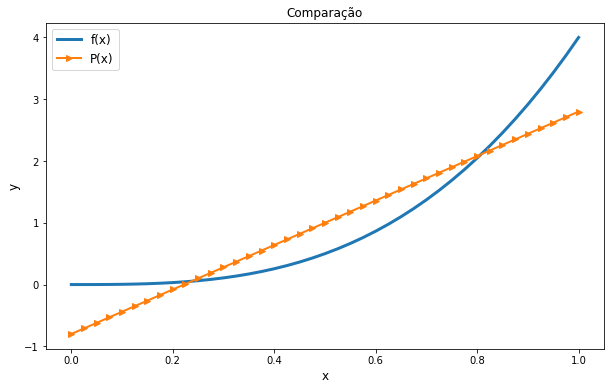

In [ ]:
f = lambda x: 4*x**3
p = lambda x: alpha[0] + alpha[1]*x
x = np.linspace(0, 1, num=41, endpoint=True)

# Vamos plotar os resultados
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,f(x),label = 'f(x)',linewidth = 3)
plt.plot(x,p(x),label = 'P(x)',linewidth = 2,marker='>')
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Comparação') 
plt.legend(fontsize='large') 
plt.show()

###**Erro da Aproximação**


O erro é dado por: $\Vert f - P_{n} \Vert^{2} = \int_{a}^b(f(x) - P_{n}(x))^2 dx.$

Portanto:

$\int_{0}^1(4x^3 - (3.6x - 0.8))^2 dx = 0.20567(Erro)$



##**Mínimos Quadrados Caso Discreto**

Dado alguns pares de pontos queremos aproximar para uma função $P_{n}$ tal que $\sum_{i=0}^{n}(y_{i} - P_{n}(x_{i}))^2$ seja o menor possível.

Temos que ver a disposição dos pontos no gráfico para tentar fazer a melhor aproximação possível.

O caso discreto têm a mesma ideia que o caso contínuo, resolver um sistema $A \cdot \alpha = b$, tal que no discreto a matriz $A = V^T \cdot V$ e $V$ é uma Matriz de Vandermonde, cujo as linhas estão em uma progressão geométrica.

###**Algoritmo**

O algoritmo consiste em resolver o sistema $A \cdot \alpha = b$.

Escrevendo de forma matricial:

$y = f(x)$

Seja $u_{k}, 0 \leq k \leq n$, são as colunas da Matriz de Vandermonde.

$\left[
  \begin{array}{c c c}
  \langle u_{0}, u_{0}\rangle & \langle u_{0}, u_{1}\rangle & \ldots & \langle u_{0}, u_{n}\rangle\\
  \langle u_{1}, u_{0}\rangle & \langle u_{1}, u_{1}\rangle & \ldots & \langle u_{1}, u_{n}\rangle\\
  \vdots & \vdots & \ldots & \vdots\\
  \langle u_{n},u_{0}\rangle & \langle u_{n}, u_{1}\rangle & \ldots & \langle u_{n}, u_{n}\rangle
  \end{array}
  \right] \left[
  \begin{array}{c}
  \alpha_{0}\\
  \alpha_{1}\\
  \vdots\\
  \alpha_{n}\\
  \end{array}\right] = \left[
  \begin{array}{c}
  \langle u_{0},f \rangle\\
  \langle u_{1},f \rangle\\
  \vdots\\
  \langle u_{n},f \rangle
  \end{array}\right]$

Foi usado a decomposição LU para resolver o sistema.

####**Exemplo:**

\begin{array}{*{20}{c}}
{{x_i}}&{{y_i}}\\
\hline
 0.0 & 1.0\\
 0.25 & 1.2840\\
 0.50 & 1.6487\\
 0.75 & 2.1170\\
 1.00 & 2.7183\\
\end{array}

Plotando estes dados no gráfico.


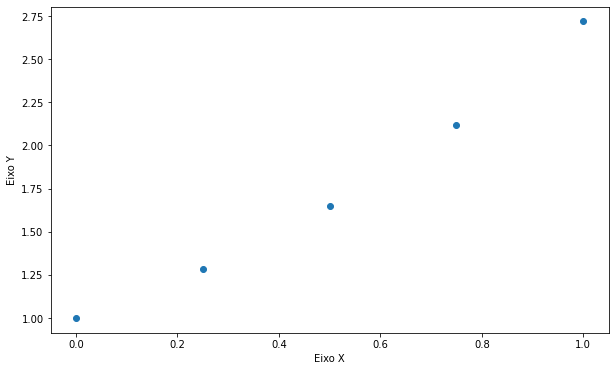

In [ ]:
dados_x = np.array([0.0, 0.25, 0.50, 0.75, 1.00]);
dados_y = np.array([1.0, 1.2840, 1.6487, 2.1170, 2.7183]);

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(dados_x, dados_y,'o')
plt.ylabel('Eixo Y')
plt.xlabel('Eixo X')
plt.show()

Iremos fazer uma aproximação para um reta e uma parábola e depois calcular o erro para verificar qual foi a melhor escolha.

###**Código**

####**Mínimos Quadrados Caso Discreto - Usando a Matriz de Vandermonde**

In [ ]:

def decompLU(A):
	L = np.eye(np.shape(A)[0]) #matriz L com a dimensao de A com a diagonal principla igual a 1
	U = np.zeros(np.shape(A)) #matriz U full zero
	lim = np.shape(A)[1] #pegando o tamanho da coluna de A (matriz quadrada)	
	sum = 0	

	for i in range(0, lim):
		for j in range(0, lim):
			sum = 0
			#Parte do somatorio de U que vai de 0 a i-1 e acumula L[i][k]*U[k][j] sendo k a variavel iteradora
			for k in range (0, i):
				sum += L[i,k]*U[k,j]
			U[i,j] = A[i,j] - sum #atribuindo o valor de U[i][j]
	
		for j in range (0, lim):
			sum = 0
			#Parte do somatorio de L que vai de 0 a i-1 e acumula L[j][k]*U[k][i] sendo k a variavel iteradora
			for k in range (0, i):
				sum+= L[j,k]*U[k,i]
			L[j,i] = (A[j,i] - sum)/U[i,i] #atribuindo o valor L[i][j]
	
	return L, U #retornando o resultado

def solveLU(L, U, b):
	#Resolvendo o sistema A*x = b
	#Como A = L*U, entao (L*U)*x = b
	#Vamos fazer L*(U*x) = b e U*x=y, portanto L*y=b
	#Logo, para encontrarmos o resultado resolvemos o sistema U*x = y 

	y = np.zeros(np.shape(b)) #matriz coluna y com a mesma dimensao de b 
	x = np.zeros(np.shape(b)) #matriz coluna x (resultado do sistema) com a mesma dimensao de b		
	
	for i in range (0, np.shape(b)[0]): #resolvendo o sistema  L*y=b
		for j in range (0,i):
			y[i] -= y[j]*L[i,j]
		y[i]+=b[i]					

	for i in range (np.shape(b)[0]-1, -1, -1): #resolvendo o sistema U*x=b
		for j in range (np.shape(b)[0]-1, i, -1):
			x[i] -= x[j]*U[i,j]
		x[i]+=y[i]
		x[i]/=U[i,i]

	return x #retornando o resultado				


def LeastSquares(x, y, n):
	V = np.vander(x,n) #criando a matriz de vandermonde 
	A = np.transpose(V).dot(V) #fazendo os produtos vetoriais e criando a matriz A
	b = np.transpose(V).dot(y) #fazendo os produtos vetoriais e criando a matriz b	
	(L,U) = decompLU(A) #fazendo a decomposicao LU para resolver o sistema
	alpha = solveLU(L,U,b) #resolvendo o sistema com a decomposicao LU
	return alpha[::-1] #retornando o vetor ao contrario 	


####**Mínimos Quadrados Caso Discreto - Usando a Decomposição $QR$**

In [ ]:

def QRDecomposition(A):
	n = np.shape(A)[0] #pegando o tamanho das linhas de A
	m = np.shape(A)[1] #pegando o tamanho das colunas de A
	Q = np.zeros((n,m)) #declarando a matriz Q
	R = np.zeros((m,m)) #declarando a matriz R
	
	for j in range(0, m):
		A_column = A[:, j] #pegando as colunas da matriz A
		V = np.zeros(n) #declarando o vetor V
		V = A_column #V igual a coluna j de A
		for i in range (0, j):
			R[i,j] = Q[:,i].dot(A_column) #fazendo o calculo do R[i,j] = coluna i de Q * coluna j de A ( i != j)
			V -= (Q[:,i].dot(A_column))*Q[:,i] #fazendo o calculo de V 			
		R[j,j] = np.linalg.norm(V) # R[j,j] = norma da coluna j de A (i == j)	
		Q[:,j] = V/np.linalg.norm(V) #normalizando V e atribuindo a coluna j de Q
		
	return Q, R			

def decompLU(A):
	L = np.eye(np.shape(A)[0]) #matriz L com a dimensao de A com a diagonal principla igual a 1
	U = np.zeros(np.shape(A)) #matriz U full zero
	lim = np.shape(A)[1] #pegando o tamanho da coluna de A (matriz quadrada)	
	sum = 0	

	for i in range(0, lim):
		for j in range(0, lim):
			sum = 0
			#Parte do somatorio de U que vai de 0 a i-1 e acumula L[i][k]*U[k][j] sendo k a variavel iteradora
			for k in range (0, i):
				sum += L[i,k]*U[k,j]
			U[i,j] = A[i,j] - sum #atribuindo o valor de U[i][j]
	
		for j in range (0, lim):
			sum = 0
			#Parte do somatorio de L que vai de 0 a i-1 e acumula L[j][k]*U[k][i] sendo k a variavel iteradora
			for k in range (0, i):
				sum+= L[j,k]*U[k,i]
			L[j,i] = (A[j,i] - sum)/U[i,i] #atribuindo o valor L[i][j]
	
	return L, U #retornando o resultado

def solveLU(L, U, b):
	#Resolvendo o sistema A*x = b
	#Como A = L*U, entao (L*U)*x = b
	#Vamos fazer L*(U*x) = b e U*x=y, portanto L*y=b
	#Logo, para encontrarmos o resultado resolvemos o sistema U*x = y 

	y = np.zeros(np.shape(b)) #matriz coluna y com a mesma dimensao de b 
	x = np.zeros(np.shape(b)) #matriz coluna x (resultado do sistema) com a mesma dimensao de b		
	
	for i in range (0, np.shape(b)[0]): #resolvendo o sistema  L*y=b
		for j in range (0,i):
			y[i] -= y[j]*L[i,j]
		y[i]+=b[i]					

	for i in range (np.shape(b)[0]-1, -1, -1): #resolvendo o sistema U*x=b
		for j in range (np.shape(b)[0]-1, i, -1):
			x[i] -= x[j]*U[i,j]
		x[i]+=y[i]
		x[i]/=U[i,i]

	return x #retornando o resultado				

def LeastSquaresQR(x, y, n):
	#Realizar a resolucao do sistema R*alpha = (Q^T)*y
	V = np.vander(x,n) #criando a matriz de vandermonde V
	(Q,R) = QRDecomposition(V) #fazendo a decomposicao V = Q*R
	b = np.transpose(Q).dot(y) #criando a matriz b = (Q^T)*y
	(L,U) = decompLU(R) #fazendo a decomposicao LU de R
	alpha = solveLU(L,U,b) #resolvendo o sistema usando a decomposicao LU (R*alpha = b / L*U*alpha = b)
	return alpha[::-1] #retornando o vetor ao contrario		


In [ ]:
alpha_reta = LeastSquares(dados_x, dados_y, 2) #aproximando para uma reta, n = grau+1
alpha_parabola = LeastSquaresQR(dados_x, dados_y, 3)#aproximando para uma parabola usando o mmq QR, n = grau+1 

print('Coeficientes da reta: {}'.format(alpha_reta))
print('Coeficientes da parábola: {}'.format(alpha_parabola))

Coeficientes da reta: [0.89968 1.70784]
Coeficientes da parábola: [1.00513714 0.86418286 0.84365714]


####**Comparação no Gráfico**

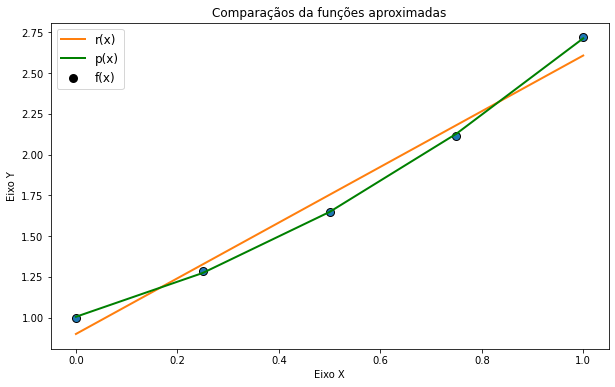

In [ ]:
reta = lambda x: alpha_reta[0] + alpha_reta[1]*x
parabola = lambda x: alpha_parabola[0] + alpha_parabola[1]*x + alpha_parabola[2]*x**2

plt.figure(figsize=(10,6),facecolor='white')
plt.scatter(dados_x,dados_y,label = 'f(x)',linewidth = 3,color='black')
plt.plot(dados_x, dados_y,'o')
plt.plot(dados_x,reta(dados_x),label = 'r(x)',linewidth = 2)
plt.plot(dados_x,parabola(dados_x),label = 'p(x)',linewidth = 2, color= 'green')
plt.ylabel('Eixo Y')
plt.xlabel('Eixo X')
plt.title('Comparaçãos da funções aproximadas') 
plt.legend(fontsize='large')
plt.show()

####**Erro da Aproximação**

Olhando o gráfico das funções aproximadas, vemos que a parábola tem uma aproximação melhor. Iremos calcular o erro para ter dados concretos sobre isso.

O erro é dados por $E = \sum_{i=0}^{n}(y_{i} - P_{n}(x_{i}))^2$


In [ ]:
Erro_reta=0
Erro_parabola=0

#Calculo o erro da aproximacao da reta 
for i in range (0,5):
	Erro_reta += (dados_y[i] - reta(dados_x[i]))**2

#Calculando o erro da aproximacao da parabola 
for i in range (0,5):
  Erro_parabola += (dados_y[i] - parabola(dados_x[i]))**2

print('Erro da aproximação da reta: {}'.format(Erro_reta))
print('Erro da aproximação da parabola: {}'.format(Erro_parabola))


Erro da aproximação da reta: 0.03919836399999997
Erro da aproximação da parabola: 0.00027413257142856686


Fazendo o cálculo para a reta, temos o erro $E = 0.03919836$

Fazendo o cálculo para a parábola, temos o erro $E = 0.0002741325$

Portanto, a parábola é uma melhor aproximação para o conjunto de dados usados no exemplo.

##**Aplicação do Método dos Mínimos Quadrados**

Para a aplicaçao do Método dos Mínimos Quadrados foi usado os dados reais de casos de COVID-19, que se encontra no site https://covid.saude.gov.br/, para as capitais da região sul do Brasil: Curitiba(Paraná), Florianópolis(Santa Catarina) e Porto Alegre(Rio Grande do Sul).

De acordo com as disposição dos dados no gráfico foi observado que a função que mais se aproxima é a exponencial $f(x) = ab^x$.

O processo para aproximar os dados para a função exponencial foi:

$\underbrace{ln(f(x))}_{F(x)} \approx \underbrace{ln(a)}_{\alpha_{0}} + \underbrace{ln(b)}_{\alpha_{1}} \ x$

Após encontrarmos o $\alpha_{0}$ e $\alpha_{1}$ conseguimos definir $a = e^{\alpha_{0}}$ e $b = e^{\alpha_{1}}$.

Os arquivos usados para a relização da aplicação foi o Curitiba-PR.txt, Florianopolis-SC.txt e o PortoAlegre-RS.txt.


Para poder ler arquivos do google drive foi usado a linha de código abaixo.

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Para entrarmos na pasta onde se encontra os arquivos foi usado a função abaixo, da biblioteca os.


In [ ]:
path = 'gdrive/My Drive/' #se os arquivos estiverem em alguma pasta, completar em path
os.chdir(path)

###**Plotando os dados de Curitiba**

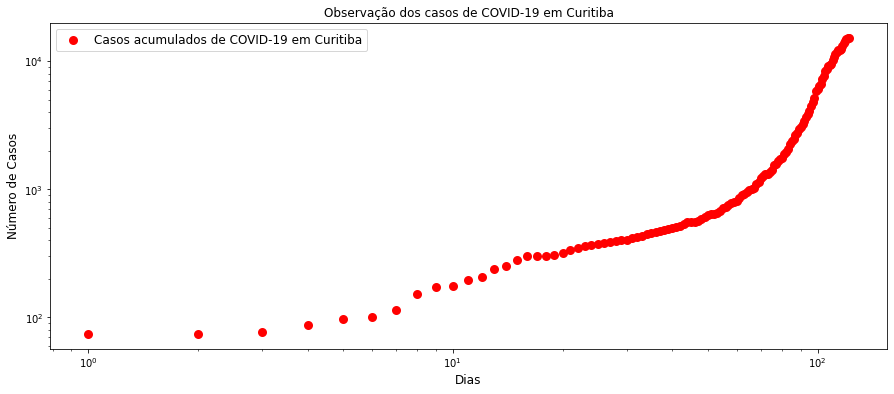

In [ ]:
dados_PR = np.genfromtxt('Curitiba-PR.txt') #y
dias = np.linspace(1, 122, num=122, endpoint=True) #x

#Plotando os dados
plt.figure(figsize=(15,6),facecolor='white')
plt.scatter(dias,dados_PR,label = 'Casos acumulados de COVID-19 em Curitiba', linewidth = 3,color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Dias',fontsize='large') 
plt.ylabel('Número de Casos',fontsize='large') 
plt.title('Observação dos casos de COVID-19 em Curitiba') 
plt.legend(fontsize='large') 
plt.show()

###**Plotando os dados de Florianópolis**

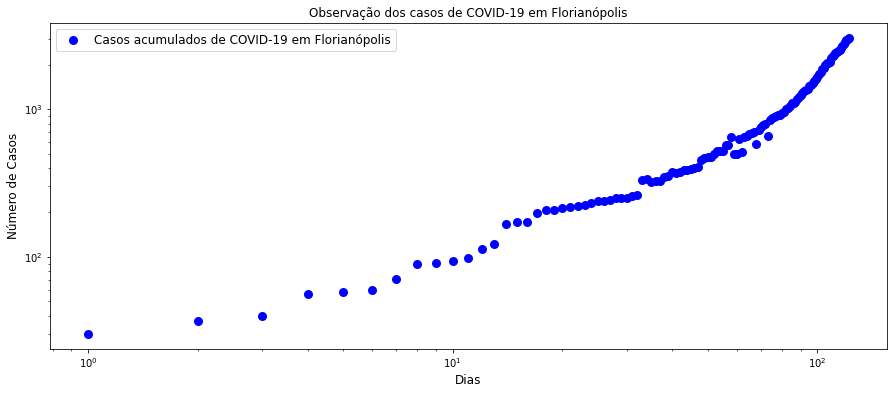

In [ ]:
dados_SC = np.genfromtxt('Florianopolis-SC.txt') #y
dias = np.linspace(1, 122, num=122, endpoint=True) #x

#Plotando os dados
plt.figure(figsize=(15,6),facecolor='white')
plt.scatter(dias,dados_SC,label = 'Casos acumulados de COVID-19 em Florianópolis', linewidth = 3,color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Dias',fontsize='large') 
plt.ylabel('Número de Casos',fontsize='large') 
plt.title('Observação dos casos de COVID-19 em Florianópolis') 
plt.legend(fontsize='large') 
plt.show()

###**Plotando os dados de Porto Alegre**

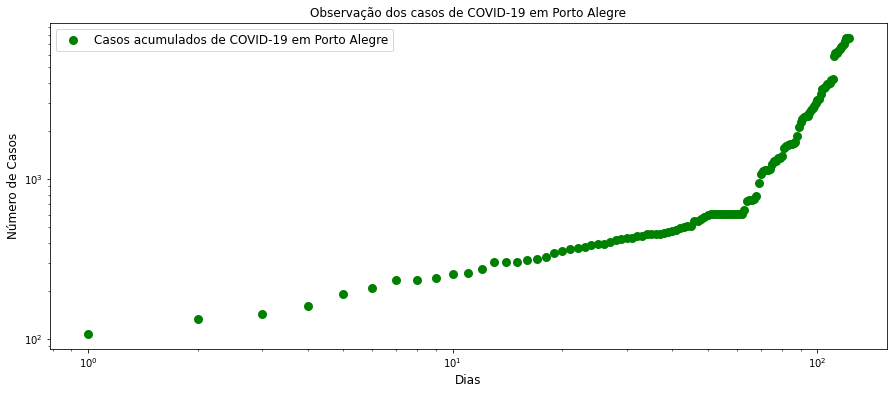

In [ ]:
dados_RS = np.genfromtxt('PortoAlegre-RS.txt') #y
dias = np.linspace(1, 122, num=122, endpoint=True) #x 

#Vamos plotar os dados
plt.figure(figsize=(15,6),facecolor='white')
plt.scatter(dias,dados_RS,label = 'Casos acumulados de COVID-19 em Porto Alegre', linewidth = 3,color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Dias',fontsize='large') 
plt.ylabel('Número de Casos',fontsize='large') 
plt.title('Observação dos casos de COVID-19 em Porto Alegre') 
plt.legend(fontsize='large') 
plt.show()

###**Aproximação da função para Curitiba**

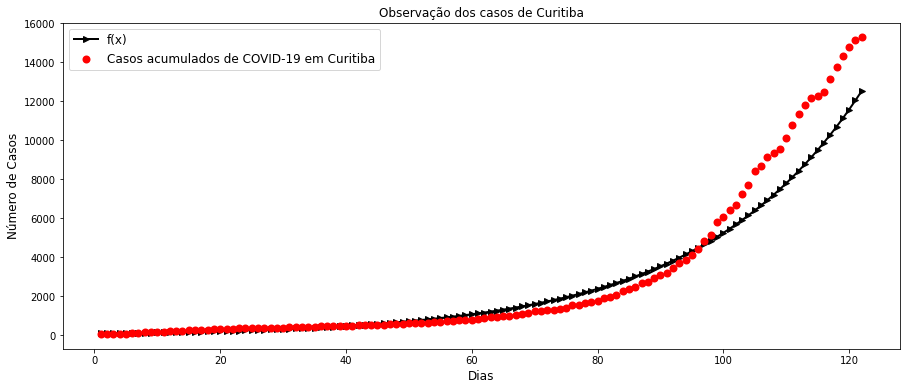

In [ ]:
dados_PR_ln = np.log(dados_PR);
alpha_PR = LeastSquaresQR(dias,dados_PR_ln,2) # a aproximação é uma reta, logo k = 2

a_PR = np.exp(alpha_PR[0]); 
b_PR = np.exp(alpha_PR[1]);
f = lambda x: a_PR*(b_PR**x);

plt.figure(figsize=(15,6),facecolor='white')
plt.plot(dias,f(dias),label = 'f(x)',linewidth = 2,marker='>',zorder=1, color = 'black')
plt.scatter(dias,dados_PR,label = 'Casos acumulados de COVID-19 em Curitiba',linewidth = 2,color='red',zorder=2)
plt.xlabel('Dias',fontsize='large') 
plt.ylabel('Número de Casos',fontsize='large') 
plt.title('Observação dos casos de Curitiba') 
plt.legend(fontsize='large') 
plt.show()

###**Aproximação da função para Florianópolis**

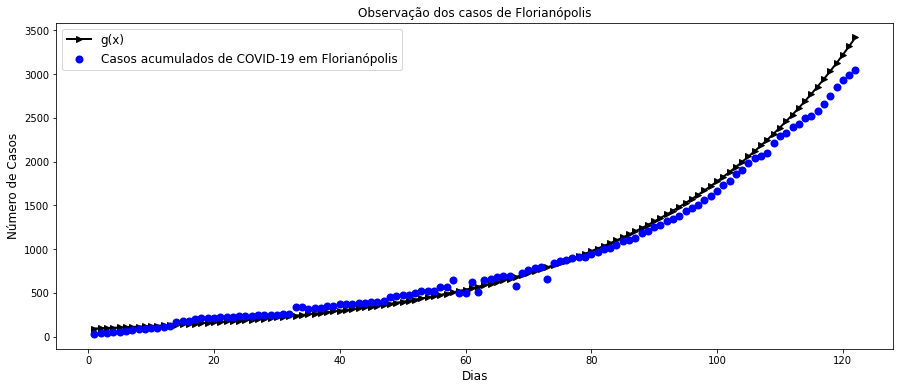

In [ ]:
dados_SC_ln = np.log(dados_SC);
alpha_SC = LeastSquaresQR(dias,dados_SC_ln,2) # a aproximação é uma reta, logo k = 2

a_SC = np.exp(alpha_SC[0]); 
b_SC = np.exp(alpha_SC[1]);
g = lambda x: a_SC*(b_SC**x);

plt.figure(figsize=(15,6),facecolor='white')
plt.plot(dias,g(dias),label = 'g(x)',linewidth = 2,marker='>',zorder=1, color = 'black')
plt.scatter(dias,dados_SC,label = 'Casos acumulados de COVID-19 em Florianópolis',linewidth = 2,color='blue',zorder=2)
plt.xlabel('Dias',fontsize='large') 
plt.ylabel('Número de Casos',fontsize='large') 
plt.title('Observação dos casos de Florianópolis') 
plt.legend(fontsize='large') 
plt.show()

###**Aproximação da função para Porto Alegre**

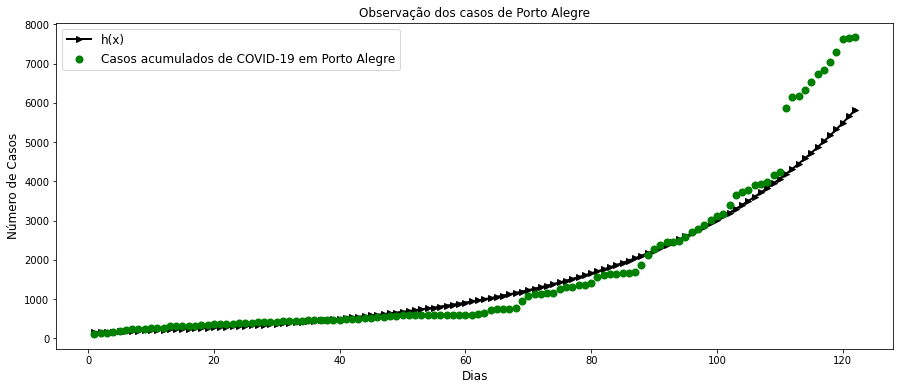

In [ ]:
dados_RS_ln = np.log(dados_RS);
alpha_RS = LeastSquaresQR(dias,dados_RS_ln,2) # a aproximação é uma reta, logo k = 2

a_RS = np.exp(alpha_RS[0]); 
b_RS = np.exp(alpha_RS[1]);
h = lambda x: a_RS*(b_RS**x);

plt.figure(figsize=(15,6),facecolor='white')
plt.plot(dias,h(dias),label = 'h(x)',linewidth = 2,marker='>',zorder=1, color = 'black')
plt.scatter(dias,dados_RS,label = 'Casos acumulados de COVID-19 em Porto Alegre',linewidth = 2,color='green',zorder=2)
plt.xlabel('Dias',fontsize='large') 
plt.ylabel('Número de Casos',fontsize='large') 
plt.title('Observação dos casos de Porto Alegre') 
plt.legend(fontsize='large') 
plt.show()




###**Comparação das funções aproximadas**

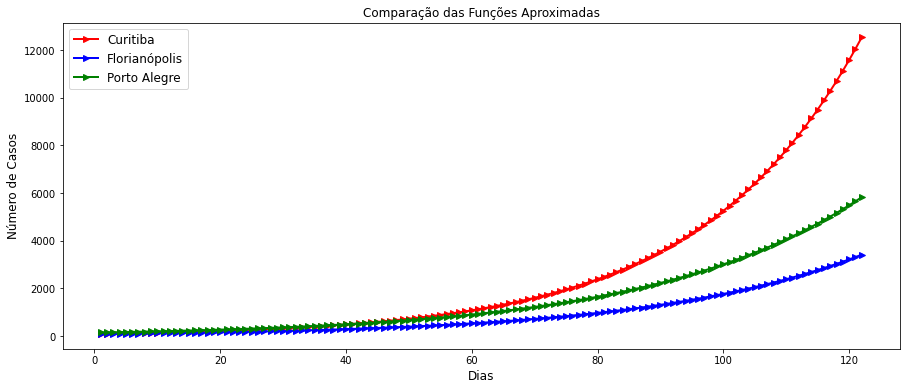

Taxa de Crescimento de Casos nas Capitais do Sul
Curitiba: 0.039470684121025584
Florianópolis: 0.02984219246141345
Porto Alegre: 0.029984770159213754


In [ ]:

plt.figure(figsize=(15,6),facecolor='white')
plt.plot(dias, f(dias),label = 'Curitiba',linewidth = 2,marker='>',zorder=1, color = 'red')
plt.plot(dias,g(dias),label = 'Florianópolis',linewidth = 2,marker='>',zorder=1, color = 'blue')
plt.plot(dias,h(dias),label = 'Porto Alegre',linewidth = 2,marker='>',zorder=1, color = 'green')
plt.xlabel('Dias',fontsize='large') 
plt.ylabel('Número de Casos',fontsize='large') 
plt.title('Comparação das Funções Aproximadas') 
plt.legend(fontsize='large') 
plt.show()

#Calculando a taxa de crescimento usando o Modelo de Malthus.

print('Taxa de Crescimento de Casos nas Capitais do Sul')
print('Curitiba: {}'.format(alpha_PR[1]))
print('Florianópolis: {}'.format(alpha_SC[1]))
print('Porto Alegre: {}'.format(alpha_RS[1]))

###**Conclusão sobre a aplicação**

Foi observado que os dados das 3 capitais podem ser aproximadas por uma função exponencial sem ocorrer um grande desvio nos dados originais.

De acordo com os resultados obtidos, foi observado que Curitiba teve o maior número de casos de COVID-19 nos 122 dias estudados, seguido de Porto Alegre e Florianópolis. Além disso, a capital do Paraná teve a maior taxa de crescimento, segundo o modelo de crescimento populacional de Malthus, com uma diferença em torno de $10^{-3}$ em relação as outras duas capitais.

##**Aplicações e Conclusões sobre o Método**

Além de ser usado para aproximar um conjunto de dados para uma função, o método de mínimos quadrados têm grande aplicação na estatística como em regressão simples, regressão múltipla e entre outros.

Existe variações deste método, como: mínimos quadrados generalizados(método para estimar parâmetros em regressão linear), mínimos quadrados ponderados(onde é levado em consideração alguns pesos na hora de calcular os mínimos quadrados) e mínimos quadrados móveis(pode ser usado em redução de ruídos em pontos de amostragem e também em geração de novos pontos).

##**Referências**
* https://pt.wikipedia.org/wiki/M%C3%A9todo_dos_m%C3%ADnimos_quadrados#:~:text=O%20M%C3%A9todo%20dos%20M%C3%ADnimos%20Quadrados,estimado%20e%20os%20dados%20observados
* https://pt.wikipedia.org/wiki/Matriz_de_Vandermonde
* https://covid.saude.gov.br/
* Slides do Afonso usados na disciplina

#**Métodos de Autovalores e Autovetores**


Relatório final sobre métodos para encontrar autovalores e autovetores.

###**Métodos implementados**
* Decomposição QR
* Método de Francis
* Método da Potência
* Método da Potência Inversa
* PageRank (Aplicação do método da potência)

###**Bibliotecas usadas**


In [ ]:
import numpy as np

##**Decomposição QR**

A decomposição $QR$ é a transformação de uma matriz *A* em um produto de matrizes ($A = Q \cdot R$), sendo $Q$ uma matriz ortogonal e $R$ uma triangular superior.

A decomposição $QR$ serve como base para o cálculo de autovalores e autovetores do Método de Francis.

O algoritmo implementado usa o Processo de Gram-Schmidt, método usado para ortogonalização de um conjunto de vetores.

###**Processo de Gram-Schmidt**
Seja $u$ e $v$ dois vetores:

- $pr(u)_{v} = \frac{uv}{\Vert v \Vert _{2}}$ : projeção de $u$ em $v$
- $pr(u)_{v^{\bot}} = u - pr(u)_{v}$ : projeção de $u$ no complementar de $v$

Dado um conjunto $LI: (a_{1}, a_{2}, a_{3}, ..., a_{n})$ 
*($a_{i}$ é a coluna da matriz $A$), queremos obter um conjunto $Q: (q_{1}, q_{2}, q_{3}, ..., q_{n})$ ortonormal.

Usando o processo de Gram-Schmidt nos vetores coluna de $A$ obtemos a decomposição $QR$

Uma representação mais compacta da decomposição $QR$ é $A = \hat {Q} \cdot \hat {R}$, onde $\hat {Q} \in M(m,n)$ e $\hat {R} \in M(n,n)$.

A representação acima é conhecida como decomposição $QR$ reduzida, e ela foi usada no desenvolvimento dos métodos em Python.


####**Algoritmo**


Ilustrando o processo iterativo:
- $v_{1} = a_{1}$
- $q_{1} = \frac {v_{1}}{\Vert v_{1} \Vert}$ (normalizando $v_{1}$)
- $v_{2} = a_{2} - (q_{1} \cdot a_{2}) \cdot q_{1} = a_{2} - pr(a_{2})_{q_{1}}$
- $q_{2} = \frac {v_{2}}{\Vert v_{2} \Vert}$ (normalizando $v_{2}$)
- $v_{3} = a_{3} - [(q_{1} \cdot a_{3}) \cdot q_{1} + (q_{2} \cdot a_{3}) \cdot q_{2}] = a_{3} - [pr(a_{3})_{q_{1}} + pr(a_{3})_{q_{2}}]$
- ...

Para os vetores colunas de $R$:
- Para $(i \neq j): q_{i} \cdot a_{j}$
- Para $(i = j): \Vert v_{j} \Vert _{2}$

Existe uma forma modificada do Processo de Gram-Schmidt que é menos sensível a erros de arredondamento. A modificação feita no algoritmo clássico é que $pr_{\bot q_{i}}$ é aplicado a todos $v_{j}$ assim que $q_{i}$ é determinado.


###Código

In [ ]:
#Decomposição QR clássica

def QRDecomposition(A):
	n = np.shape(A)[0] #pegando o tamanho das linhas de A
	m = np.shape(A)[1] #pegando o tamanho das colunas de A
	Q = np.zeros((n,m)) #declarando a matriz Q
	R = np.zeros((m,m)) #declarando a matriz R
	
	for j in range(0, m):
		A_column = A[:, j] #pegando as colunas da matriz A
		V = np.zeros(n) #declarando o vetor V
		V = A_column #V igual a coluna j de A
		for i in range (0, j):
			R[i,j] = Q[:,i].dot(A_column) #fazendo o calculo do R[i,j] = coluna i de Q * coluna j de A ( i != j)
			V -= (Q[:,i].dot(A_column))*Q[:,i] #fazendo o calculo de V 			
		R[j,j] = np.linalg.norm(V) # R[j,j] = norma da coluna j de A (i == j)	
		Q[:,j] = V/np.linalg.norm(V) #normalizando V e atribuindo a coluna j de Q
		
	return Q, R			

In [ ]:
#Decomposição QR Modificada

def QRDecompositionModificada(A):
	n = np.shape(A)[0] #pegando o tamanho das linhas de A
	m = np.shape(A)[1] #pegando o tamanho das colunas de A
	Q = np.zeros((n,m)) #declarando a matriz Q
	R = np.zeros((m,m)) #declarando a matriz R
	V = np.copy(A) #copiando A para V

	for j in range(0, m):
		for i in range (0, j):
			R[i,j] = Q[:,i].dot(V[:,j]) #fazendo o calculo do R[i,j] = coluna i de Q * coluna j de V ( i != j)
			V[:,j] -= (Q[:,i].dot(V[:,j]))*Q[:,i] #fazendo o calculo de V 			
		R[j,j] = np.linalg.norm(V[:,j]) # R[j,j] = norma da coluna j de V (i == j)	
		Q[:,j] = V[:,j]/np.linalg.norm(V[:,j]) #normalizando V e atribuindo a coluna j de Q
		
	return Q, R			


####**Exemplo de funcionamento**

Matrizes usadas:

$ A = \left[
      \begin{array}{c c}
       1 & 2\\
       1 & 3\\
      -2 & 0\\ 
      \end{array}
       \right]$ e 
$ B = \left[
      \begin{array}{c c}
       3 & 1\\
       4 & -1\\ 
      \end{array}
       \right]$


In [ ]:
A = np.array([[1,2],[1,3],[-2,0]], dtype='double')
B = np.array([[3,1], [4,-1]], dtype = 'double')

In [ ]:
print('Decomposicao QR classica para a matriz A\n')
(Q, R) = QRDecomposition(A)
print('{}\n\n{}\n\n'.format(Q, R))

print('Decomposicao QR classica para a matriz B\n')
(Q, R) = QRDecomposition(B)
print('{}\n\n{}'.format(Q, R))

In [ ]:

print('Decomposicao QR modificada para a matriz A\n')
(Q, R) = QRDecompositionModificada(A)
print('{}\n\n{}\n\n'.format(Q, R)) 
print('Decomposicao QR modificada para a matriz B\n')
(Q, R) = QRDecomposition(B)
print('{}\n\n{}'.format(Q, R))


In [ ]:
print('Decomposicao QR do Python para a matriz A\n')
(Q_python,R_python) = np.linalg.qr(A)
print('{}\n\n{}'.format(Q_python, R_python))
print('Decomposicao QR do Python para a matriz B\n')
(Q_python,R_python) = np.linalg.qr(B)
print('{}\n\n{}'.format(Q_python, R_python))


###**Aplicações e Conclusões sobre o Método**


A Decomposição $QR$ pode ser usada no cálculo da Decomposição $SVD$ (Decomposição em valores singulares) que tem várias aplicações na estatística, processamento de sinais e também em compressão de imagem. A Decomposição $SVD$ é usada em problema de mínimos quadrados totais (total least sqares), solução de sistemas lineares homogêneos, no Algoritmo de Kabsch (aplicação na robótica) e entre outros.

A Decomposição $QR$ implementada foi usado como base o Processo de Gram-Schmidt, mesmo sendo numericamente instável é de fácil implementação, mas existe outras formas de realizar essa decomposição, como o uso de Reflexões de Householder e usando Rotações de Givens.

##**Método de Francis**

Este método utiliza a decomposição $QR$ em seu algoritmo para determinar todos os autovalores e autovetores de uma matriz sem determinar o seu polinômio característico.

###**Algoritmo**


Seja $A \in M(n,n)$ simétrica.

- $A_{1} = A \Rightarrow$ (Realizando a decomposição $QR$) $A_{1} = Q_{1}R_{1}$
- $A_{2} = R_{1}Q_{1} \Rightarrow A_{2} = Q_{2}R_{2}$
- $A_{3} = R_{2}Q_{2} \Rightarrow A_{3} = Q_{3}R_{3}$
- ...
- $A_{k} = R_{k-1}Q_{k-1} \Rightarrow A_{k} = Q_{k}R_{k}$

$V = Q_{1} \cdot Q_{2} \cdot Q_{3} \cdot  ...  Q_{k}$

Critério de Parada: quando o maior elemento fora da diagonal principal for menor que o erro recebido como parâmetro a loop irá terminar.

Os elementos da diagonal principal de $A_{k}$ nos fornece uma aproximação para os autovalores de $A$, e as colunas de $V$ uma aproximação dos autovetores.

###**Código**

In [ ]:

def FrancisMethod(A, error):

	m = np.inf #declarando m como infinito
	Autovetores = np.eye(np.shape(A)[0]) #declarando a matriz de autovetores como uma matriz indentidade	
	while m > error:
		(Q, R) = QRDecomposition(A) #fazendo a decomposicao QR de A
		A = R.dot(Q) #fazendo A = R*Q
		Autovetores = Autovetores.dot(Q) #pegando os autovetores V = Q1 * Q2 * Q3 * ... 
		m = -np.inf #declarando m como menos infinito
		#pegando o maior valor da matriz A fora da diagonal principal
		for i in range (0, np.shape(A)[0]):
			for j in range (0, np.shape(A)[1]):
				if (i != j) and (m < np.abs(A[i,j])):
					m = np.abs(A[i,j])
	
	Autovalores = np.diag(A) #pegando a diagonal principal da matriz A
	
	return Autovalores, Autovetores #retornando o resultado


####**Exemplo de funcionamento**

Matriz usada:

$ A = \left[
      \begin{array}{c c c c}
       2 & 1 & 1\\
       1 & 3 & 5\\
       1 & 5 & 14\\ 
      \end{array}
       \right]$

In [ ]:
A = np.array([[2,1,1],[1,3,5], [1,5,14]], dtype = 'double')
(Aut, Vet) = FrancisMethod(A, 0.000001)
print('{}\n\n{}'.format(Aut, Vet))

##**Método da Potência**

Este método calcula os autovalores e autovetores dada uma matriz A.

Conhecido como iteração de Von Mises este algoritmo calcula apenas o autovalor dominante.

###**Quociente de Rayleigh**

$\mu(x) = \frac{x \cdot Ax}{\Vert x \Vert _{2} ^ 2}$

Quando $x$ é autovetor de $A$ o $\mu(x)$ nos fornece o autovalor associado a $x$.



###**Algoritmo**


Dado um chute inicial normalizado. O processo iterativo é realizado dessa forma :

$x^{(k)} = A \cdot y^{(k-1)}$ ($y^{(k-1)}$ é o $x^{(k-1)}$ normalizado)

$y^{(k)} = \frac {x^{(k)}}{\Vert x^{(k)} \Vert _{2}}$ (normalizando o $x^{(k)}$)

$\lambda_{1}^{(k)} = y^{(k)} \cdot Ay^{(k)}$ ($\lambda_{1}^{(k)}$ é a aproximação para o autovalor dominante)

Critérios de parada:
* $k = k_{max}$
* $\mid \lambda_{1}^{(k+1)} - \lambda_{1}^{(k)} \mid < \epsilon$
* Teste de alinhamento: $\mid \mid y^{(k+1)} \cdot y^{(k)} \mid -1 \mid < \epsilon$ 


###**Código**

In [ ]:
def power_method(A, error_tol):
	lim = 10000 #Numero maximo de iteracoes
	error = np.inf #atribuicao de infinito para o erro
	n = A.shape[1] #pegando a dimensao da matriz A quadrada
	y0 = np.zeros(n)  
	y0[0] = 1 #chute inicial normalizado

	for k in range (0, lim):	
		xk = A.dot(y0) #produto de matrizes (x^k) = A * y^(k-1) 
		yk = xk/np.linalg.norm(xk) #normalizando xk	
		error = np.abs(np.abs(y0.dot(yk))-1) #teste de alinhamento, calculando o erro
		if error <= error_tol: # se o erro for menor que a tolerancia recebida como parametro, pode parar a iteracao
			break
		y0 = yk #atribuindo o novo y0
 		
	lambda_1 = y0.dot(A.dot(y0)) #calculando o lambda_1 = y^k * (A * y^k)
	
	return lambda_1, y0 #retornando o autovalor e seu autovetor associado

####**Exemplo de funcionamento**

Matriz usada: 

$ A = \left[
      \begin{array}{c c c}
       12 & 2 & 3\\
       2 & 3 & 5\\
       3 & 5 & -2\\ 
      \end{array}
       \right]$

In [ ]:
A = np.array([[12, 2, 3],[ 2, 3, 5],[ 3, 5,-2]], dtype='double')

(autovalor, autovetor) = power_method(A, 0.000000001) #usando o metodo da potencia implementado com erro em torno de 10^-9
print('Método Implementado: {0:.15f}'.format(autovalor))

In [ ]:
(D,V) = np.linalg.eig(A) #usando uma funcao pronta para calcular todos os autovalores
print('Método do Python: {0:.15f}'.format(np.max(abs(D))))

##**Método da Potência Inversa**

O método da potência inversa têm a mesma ideia que a da potência clássica, só que irá ser calculado o autovalor dominante de $A^{-1}$. Portanto $\frac {1}{\lambda_{n}}$ será o autovalor que será procurado.

###**Algoritmo**

Dado um chute inicial normalizado. O processo iterativo é realizado dessa forma :

$x^{(k)} = A^{-1} \cdot y^{(k-1)}$ ($y^{(k-1)}$ é o $x^{(k-1)}$ normalizado)

$y^{(k)} = \frac {x^{(k)}}{\Vert x^{(k)} \Vert _{2}}$ (normalizando o $x^{(k)}$)

$\lambda_{1}^{(k)} = y^{(k)} \cdot Ay^{(k)}$ ($\lambda_{1}^{(k)}$ é a aproximação para o autovalor dominante)

Critérios de parada:
* $k = k_{max}$
* $\mid \lambda_{1}^{(k+1)} - \lambda_{1}^{(k)} \mid < \epsilon$
* Teste de alinhamento: $\mid \mid y^{(k+1)} \cdot y^{(k)} \mid -1 \mid < \epsilon$ 

Como o cálculo da matriz inversa é uma operação muito custosa, no código implementado foi resolvido o sistema linear $Ax^{(k)} = y^{(k-1)}$ (se multiplicarmos $A$ nos dois lados,da primeira equação citada, chegamos neste sistema) usando a Decomposição $LU$.


###**Código**

In [ ]:

def decompLU(A):
	L = np.eye(np.shape(A)[0]) #matriz L com a dimensao de A com a diagonal principla igual a 1
	U = np.zeros(np.shape(A)) #matriz U full zero
	lim = np.shape(A)[1] #pegando o tamanho da coluna de A (matriz quadrada)	
	sum = 0	

	for i in range(0, lim):
		for j in range(0, lim):
			sum = 0
			#Parte do somatorio de U que vai de 0 a i-1 e acumula L[i][k]*U[k][j] sendo k a variavel iteradora
			for k in range (0, i):
				sum += L[i,k]*U[k,j]
			U[i,j] = A[i,j] - sum #atribuindo o valor de U[i][j]
	
		for j in range (0, lim):
			sum = 0
			#Parte do somatorio de L que vai de 0 a i-1 e acumula L[j][k]*U[k][i] sendo k a variavel iteradora
			for k in range (0, i):
				sum+= L[j,k]*U[k,i]
			L[j,i] = (A[j,i] - sum)/U[i,i] #atribuindo o valor L[i][j]
	
	return L, U #retornando o resultado

def solveLU(L, U, b):
	#Resolvendo o sistema A*x = b
	#Como A = L*U, entao (L*U)*x = b
	#Vamos fazer L*(U*x) = b e U*x=y, portanto L*y=b
	#Logo, para encontrarmos o resultado resolvemos o sistema U*x = y 

	y = np.zeros(np.shape(b)) #matriz coluna y com a mesma dimensao de b 
	x = np.zeros(np.shape(b)) #matriz coluna x (resultado do sistema) com a mesma dimensao de b		
	
	for i in range (0, np.shape(b)[0]): #resolvendo o sistema  L*y=b
		for j in range (0,i):
			y[i] -= y[j]*L[i,j]
		y[i]+=b[i]					

	for i in range (np.shape(b)[0]-1, -1, -1): #resolvendo o sistema U*x=b
		for j in range (np.shape(b)[0]-1, i, -1):
			x[i] -= x[j]*U[i,j]
		x[i]+=y[i]
		x[i]/=U[i,i]

	return x #retornando o resultado			


In [ ]:
def inverse_method(A, error_tol):
	lim = 10000 #definindo um limite de iteracoes
	error = np.inf #atribuindo infinito para o erro
	n = A.shape[1] # pegando a dimensao da matriz A quadrada
	y0 = np.zeros(n)
	y0[0] = 1 #chute inicial normalizado 	
	
	(L, U) = decompLU(A) #fazendo a decomposicao LU de A

	for k in range (0, lim):
		xk = solveLU(L, U, y0) #resolvendo o sistema Ax^k = y^(k-1) com decomposicao LU
		yk = xk/np.linalg.norm(xk) #normalizando xk
		error = np.abs(np.abs(y0.dot(yk))-1) #teste de alinhamento			
		if error <= error_tol: #se o erro for menor que a tolerancia recebida como parametro, pode parar a iteracao
			break
		y0 = yk
	
	lambda_1 = y0.dot(A.dot(y0)) #calculando o lambda_1 = y^k * (A * y^k)
	
	return lambda_1, y0 #retornando o autovalor e seu autovetor associado			



###**Exemplo de funcionamento**

Matriz usada:

$ A = \left[
      \begin{array}{c c c}
       12 & 2 & 3\\
       2 & 3 & 5\\
       3 & 5 & -2\\ 
      \end{array}
       \right]$
       

In [ ]:
A = np.array([[12, 2, 3], [ 2, 3, 5],[ 3, 5,-2]], dtype='double')
(autovalor, autovetor) = inverse_method(A,0.000000001) #usando o metodo da potencia inversa implementado com erro em torno de 10^-9
print('Método Implementado: {0:.9f}'.format(autovalor))  

In [ ]:
(D, V) = np.linalg.eig(A) #usando uma funcao pronta para calcular todos os autovalores
print('Método do Python: {0:.9f}'.format(np.min(abs(D))))

##**PageRank**

O PageRank(PR) é o algoritmo desenvolvido por Larry Page (Co-Founder do Google) para rankear as páginas web. Foi o primeiro algoritmo usado pela companhia e é a mais conhecida.

O valor obtido no PR representa a probabilidade de algum usuário chegar nessa página clicando aleatoriamente em links em outros sites.

O algoritmo consiste em um processo iterativo que usa a ideia de grafos para a estrutura dos dados, onde cada vértice é um site e as arestas são os links para as outras páginas, contidos dentro dos sites. 



###**Algoritmo**
O algoritmo desenvolvido foi o PageRank simplificado.


O algoritmo recebe como entrada uma matriz $A$ que consiste em uma matriz de adjacência que é uma das formas de representar um grafo.

*Será usada uma matriz de exemplo para ajudar na explicação do algoritmo.

Seja  $A = \left[
      \begin{array}{c c c c c}
       0 & 0 & 0 & 0 & 1\\
       1 & 0 & 0 & 0 & 0\\
       1 & 0 & 0 & 0 & 0\\
       0 & 1 & 1 & 0 & 0\\
       0 & 0 & 1 & 0 & 0\\ 
      \end{array}
       \right]$

*Se $A_{ij} = 1$ então existe um link do site $i$ para o $j$, se não $A_{ij} = 0$

$A$ precisa ser transformada em um matriz estocástica(a soma dos vetores coluna é igual a 1).

$E_{ij} = \left\{
    \begin{array}\\
        \frac {A_{ij}}{C_{j}} & \mbox{se} \  C_{j} \neq 0 \\
        0 & \mbox{caso contrário} \\
    \end{array}
\right.$

$C_{j} = \sum_{i=1}^{n} A_{ij}$

Transformando a matriz $A$ em estocástica. 

$E = \left[
      \begin{array}{c c c c c}
       0 & 0 & 0 & 0 & 1\\
       1/2 & 0 & 0 & 0 & 0\\
       1/2 & 0 & 0 & 0 & 0\\
       0 & 1 & 1/2 & 0 & 0\\
       0 & 0 & 1/2 & 0 & 0\\ 
      \end{array}
       \right]$

Para resolver problemas de sites que não tem link para nenhuma outra página será usado um vetor $D$.

O vetor resultante $S = E + D$

$D_{j} = \left\{
    \begin{array}\\
        \frac {1}{n} & \mbox{se} \  C_{j} = 0 \\
        0 & \mbox{caso contrário} \\
    \end{array}
\right.$

Calculando o vetor D para o exemplo citado anteriormente.

$D = \left[
      \begin{array}{c c c c c}
       0 & 0 & 0 & 1/5 & 0\\
       0 & 0 & 0 & 1/5 & 0\\
       0 & 0 & 0 & 1/5 & 0\\
       0 & 0 & 0 & 1/5 & 0\\
       0 & 0 & 0 & 1/5 & 0\\ 
      \end{array}
       \right]$

Resolvendo a equação $S = E +  D$, resultamos com:


$S = \left[
      \begin{array}{c c c c c}
       0   & 0 & 0 & 1/5 & 1\\
       1/2 & 0 & 0 & 1/5 & 0\\
       1/2 & 0 & 0 & 1/5 & 0\\
       0 & 1 & 1/2 & 1/5 & 0\\
       0 & 0 & 1/2 & 1/5 & 0\\ 
      \end{array}
       \right]$

Para evitar ciclos no grafo $S$ será modificado de modo a torna-lo irredutível.

Será usado um peso $\alpha$ e uma matriz $B \in M(n,n)$ como todos os valores igual a $\frac{1}{n}$.

A equação resultante do grafo será: $G = \alpha \cdot S + (1-\alpha) \cdot B$

Calculando o grafo resultante com peso $\alpha = 0.85$ ficaremos com:

$G = 0.85 \cdot \left[
      \begin{array}{c c c c c}
       0   & 0 & 0 & 1/5 & 1\\
       1/2 & 0 & 0 & 1/5 & 0\\
       1/2 & 0 & 0 & 1/5 & 0\\
       0 & 1 & 1/2 & 1/5 & 0\\
       0 & 0 & 1/2 & 1/5 & 0\\ 
      \end{array}
       \right] + (1- 0.85) \cdot \left[
      \begin{array}{c c c c c}
       1/5 & 1/5 & 1/5 & 1/5 & 1/5\\
       1/5 & 1/5 & 1/5 & 1/5 & 1/5\\
       1/5 & 1/5 & 1/5 & 1/5 & 1/5\\
       1/5 & 1/5 & 1/5 & 1/5 & 1/5\\
       1/5 & 1/5 & 1/5 & 1/5 & 1/5\\ 
      \end{array}
       \right]$

Resolvendo a equação, resultaremos em :

$G = \left[
      \begin{array}{c c c c c}
       0.03 & 0.03 & 0.03 & 0.2 & 0.88\\
       0.455 & 0.03 & 0.03 & 0.2 & 0.03\\
       0.455 & 0.03 & 0.03 & 0.2 & 0.03\\
       0.03 & 0.88 & 0.455 & 0.2 & 0.03\\
       0.03 & 0.03 & 0.455 & 0.2 & 0.03\\ 
      \end{array}
       \right]$

Para finalizar será usado o método da potência para a resolução de $ \ p^{(t+k)} = A^k \cdot p^{(t)}$. Sendo $p^{(t)}$ a distribuição de probabilidade no tempo $t$.

Será usado $p^{0} = \left[
      \begin{array}{c}
       1/5\\
       1/5\\
       1/5\\
       1/5\\
       1/5\\ 
      \end{array}
       \right]$

A parte da iteração será resolvido em código.

###**Código**

In [ ]:

def PageRank(A, alpha, max_iter):
	
	#Transformando a matriz A em uma matriz estocastica.
	
	C = A.sum(axis=0) #Pegando a soma das colunas.
	n = np.shape(A)[0] #Pegando a dimensao da matriz quadrada.
	
	for i in range (0,n): 
		if C[i] != 0:
			A[:,i] = A[:,i]/C[i] #Dividindo cada elemento da matriz pela soma da sua coluna.
	
	#Para resolver os "becos sem saidas", d[i,j] = 1/n se C[j] = 0 se nao d[i,j] = 0
	y = np.ones(n)
	D = np.zeros(np.shape(A)) #Declarando uma matriz so de zeros com a mesma dimensao que A. 	
	for i in range (0, n): #Realizando o algoritmo explicado anteriormente.
		for j in range (0,n):
			if C[j] == 0:
				D[i,j] = 1/n;
	A += D #Somando a matriz D em A
	#---------------------------------------------------------------------------------------
	
	B = np.full((n,n), 1/n)
	O = np.ones(n)

	G = alpha * A + (1-alpha)*B
	
	p = np.full(n, 1/n)  

  #Resolvendo o método da potencia com um maximo de iteracoes
	for i in range (0, max_iter):
		p = G.dot(p)		
	return p	

In [ ]:
A = np.array([[0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0],
              [1, 0, 0, 0, 0],
              [0, 1, 1, 0, 0],
              [0, 0, 1, 0, 0]], dtype ='double')

PR = PageRank(A, 0.85, 100)
print('Page Rank resultante:')
print(PR)

##**Aplicações e Conclusões sobre o Método**

A aplicação mais cohecida sobre o método da potência é o PageRank(implementado anteriormente) que o Google usa, além disso existe algumas variaçẽs deste método como por exemplo o método da potência inversa.

Algumas aplicações interessantes sobre o método da potência é a aplicação na sequência de fibonacci, o uso do método nos fornece uma equação que nos permite o cálculo do enésimo número da sequência.

Este método também têm aplicação nas Matrizes de Leslie e Cresimento Populacional.

##**Referências**

* https://pt.wikipedia.org/wiki/Processo_de_Gram-Schmidt
* https://pt.wikipedia.org/wiki/Decomposi%C3%A7%C3%A3o_QR
* https://pt.wikipedia.org/wiki/M%C3%A9todo_das_pot%C3%AAncias
* https://en.wikipedia.org/wiki/PageRank
* https://pt.wikipedia.org/wiki/Decomposi%C3%A7%C3%A3o_em_valores_singulares
* Slides do Afonso usados na disciplina


#**Solução de Sistemas Lineares: métodos diretos e métodos iterativos**

<br>

###**Métodos diretos**

Ao se aplicar um método direto sobre um problema, obtem-se a resposta sem aproximações (sem considerar aquelas causadas pela utilização do ponto flutuante da máquina) do que se deseja. Em outras palavras, o sistema programado utiliza de métodos aplicados comumente, como a "Eliminação de Gauss" para encontrar as raízes de um problema.

Alternativas mais recorrentes de resolução por métodos diretos são: Eliminação de Gauss, Decomposição LU e Decomposição de Cholesky

<br>

####**Decomposição LU** 

O processo de decomposição LU consiste na transformação da matriz $A$, fazendo com que tenhamos:

><center>$A = L.U$

Dessa forma, poderemos reescrever a igualdade $Ax = b$ como $LUx = b$ e utilizar tal decomposição da matriz $A$ para encontrar as raízes do sistema.
Para isso, se fizermos a decomposição em $L \in A$ dada matriz $A \in M(n,n)$, teremos


><center>$L=\begin{bmatrix}1 & 0 & 0 & ... & 0\\
l_{22} & 1 & 0 & ... & 0\\
l_{31} & l_{32} & 1 & ... & 0\\
...    &  ...   &  ...   & ... & ... \\
l_{n1} & l_{n2} & l_{n3} & ... & 1\\
\end{bmatrix}$

><center>$U=\begin{bmatrix}u_{11} & u_{12} & u_{13} & ... & u_{1n}\\
0 & u_{22} & u_{23} & ... & u_{2n}\\
0 & 0 & u_{33} & ... & u_{3n}\\
...    &  ...   &  ...   & ... & ... \\
0 & 0 & 0 & ... & u_{nn}\\
\end{bmatrix}$

Para fazer isso, podemos usar de vários métodos, tais como a Eliminação de Gauss e o Método de Doolittle.

<br>

**Método de Doolittle para Decomposição LU**

No 1º Passo a primeira linha de u é igual a primeira linha de a. Para obter a primeira coluna de l, dividimos a primeira linha de a pelo primeiro elemento de u:

><center>$u_{1j} = a_{1j}\\
l_{i1} = a_{i1}/u_{11}$


A seguir, para a segunda linha de u e segunda coluna de l:

><center>$u_{2j} = a_{2j} - l_{21}u_{1j}\\
l_{i2} = \frac{a_{i2} - u_{12}l_{i1}}{u_{22}}$


Para generalizar, temos u e l:


><center>$u_{ij} = a_{ij} - \sum^{i-1}_{k=1} u_{kj}l_{ik}\\
l_{ij} = \frac{a_{ij} - \sum^{j-1}_{k=1} u_{kj}l_{ik}}{u_{jj}}$

À primeira vista, tal generalização parece complexa de ser compreendida, porém, basta um pouco mais de atenção para perceber que $l_{ij}$ realiza o mesmo procedimento de $u_{ij}$ com a diferença de que se preenchem as colunas. ao invés das linhas, como em u, e os valores são divididos por $u_{jj}$

<br>

**Utilização da Decomposição LU para resolução de Sistemas Lineares**

É possível usar a Decomposição LU para resolução de sistemas lineares, se isso for necessário, como dito acima, ao fazer $LUx = b$ tomamos $y = Ux$ e, assim, como temos $Ly = b$  com L sendo triangular inferior (o que faz o sistema facilmente calculavel) encontramos os valores de $y$ e, em seguida, os substituimos em $y = Ux$, encontrando os valores de $x$ desejados. 

<br>

###**Implementação da Decomposição LU**


In [ ]:
import numpy as np
import sympy

def decompLU(A):
	L = np.eye(np.shape(A)[0]) #matriz L com a dimensao de A com a diagonal principla igual a 1
	U = np.zeros(np.shape(A)) #matriz U full zero
	lim = np.shape(A)[1] #pegando o tamanho da coluna de A (matriz quadrada)	
	sum = 0	

	for i in range(0, lim):
		for j in range(0, lim):
			sum = 0
			#Parte do somatorio de U que vai de 0 a i-1 e acumula L[i][k]*U[k][j] sendo k a variavel iteradora
			for k in range (0, i):
				sum += L[i,k]*U[k,j]
			U[i,j] = A[i,j] - sum #atribuindo o valor de U[i][j]

		for j in range (0, lim):
			sum = 0
			#Parte do somatorio de L que vai de 0 a i-1 e acumula L[j][k]*U[k][i] sendo k a variavel iteradora
			for k in range (0, i):
				sum+= L[j,k]*U[k,i]
			L[j,i] = (A[j,i] - sum)/U[i,i] #atribuindo o valor L[i][j]
	
	return L, U #retornando o resultado

def solveLU(L, U, b):
	#Resolvendo o sistema A*x = b
	#Como A = L*U, entao (L*U)*x = b
	#Vamos fazer L*(U*x) = b e U*x=y, portanto L*y=b
	#Logo, para encontrarmos o resultado resolvemos o sistema U*x = y 

	y = np.zeros(np.shape(b)) #matriz coluna y com a mesma dimensao de b 
	x = np.zeros(np.shape(b)) #matriz coluna x (resultado do sistema) com a mesma dimensao de b		
	
	for i in range (0, np.shape(b)[0]): #resolvendo o sistema  L*y=b
		for j in range (0,i):
			y[i] -= y[j]*L[i,j]
		y[i]+=b[i]					

	for i in range (np.shape(b)[0]-1, -1, -1): #resolvendo o sistema U*x=b
		for j in range (np.shape(b)[0]-1, i, -1):
			x[i] -= x[j]*U[i,j]
		x[i]+=y[i]
		x[i]/=U[i,i]

	return x #retornando o resultado				




##**Decomposição de Cholesky**

O objetivo da decomposição de Cholesky é separar a matriz principal em um produto de duas matrizes, sendo uma delas comum e a outra a transposta dessa comum.

><center> $A = H.H^T$

Sendo H uma matriz do tipo:

><center>$H=\begin{bmatrix}h_{11} & 0 & 0 & ... & 0\\
h_{21} & h_{22} & 0 & ... & 0\\
h_{31} & h_{32} & h_{33} & ... & 0\\
...    &  ...   &  ...   & ... & ... \\
h_{n1} & h_{n2} & h_{n3} & ... & h_{nn}\\
\end{bmatrix}$

e $h_{ii} > 0, i=1,...,n.$

<br>

Para calcular os termos da diagonal:

<br>

><center>$h_{ii} = \sqrt{a_{ii} - \sum^{i-1}_{k=1}h^{2}_{ik}}$

<br>

Para calcular os termos fora da diagonal:

><center>$h_{ij} = \frac{a_{ij} - \sum^{j-1}_{k=1}h_{ik}h_{jk}}{h_{jj}}$

<br>




###**Implementação da Decomposição de Cholesky**

In [ ]:
import numpy as np
import scipy 
import scipy.linalg 

def choleskydecomp(A):

    n = np.shape(A)[0]
    h = np.tril(A)

    for i in range(n-1):
        if h[i,i] <= 0:
            return -1 #Valor negativo ou 0 na diagonal principal, retorna
        h[i,i] = np.sqrt(h[i,i])
        h[i+1:n,i] = h[i+1:n,i]/h[i,i]
        for j in range(i+1, n):
            h[j:n,j] = h[j:n,j] - h[j:n,i]*h[j,i]

    h[n-1,n-1] = np.sqrt(h[n-1,n-1])

    return h







##**Eliminação de Gauss** 

O processo desenvolvido na Eliminação de Gauss, também muito conhecido como método de escalonamento, consiste em, primeiramente, utilizarmos uma matriz aumentada de **A**x = **b**, tendo em vista que todas as matrizes quadradas menores presentes dentro de A (cujo ultimo elemento é A<sub>ii</sub>) tenham $det(A_{k}) \neq$ 0, dessa forma, precisamos de:

> <center>$\begin{bmatrix}A & | & b\\ 
\end{bmatrix}$

Assim, montamos uma matriz, do tipo: 

><center>$\begin{bmatrix}\color{#D0AF00}a_\color{#D0AF00}{11} & a_{12} & a_{13} & ... & a_{1n} & b_{1}\\
a_{21} & \color{#D0AF00}a_\color{#D0AF00}{22} & a_{23} & ... & a_{2n} & b_{2}\\
a_{31} & a_{32} & \color{#D0AF00}a_\color{#D0AF00}{33} & ... & a_{3n} & b_{3}\\
...    &  ...   &  ...   & ... & ...    & ...  \\
a_{n1} & a_{n2} & a_{n3} & ... & a_{nn} & b_{n}\\
\end{bmatrix}$

<br>

Utilizando um pivô escolhido na diagonal principal do sistema de equações (com tal "pivô" diferente de 0) para obter as raízes desse sistema, se divide o elemento inferior pelo pivô com o objetivo de zerar os elementos abaixo dele, no caso apresentado, fazendo para o primeiro elemento, teremos:

><center>$a_{21}/a_{11}$


Multiplicando-se a linha do pivo e somando na linha abaixo, zeraremos o primeiro elemento, obtendo:

><center>$\begin{bmatrix}\color{#D0AF00}a_\color{#D0AF00}{11} & a_{12} & a_{13} & ... & a_{1n} & b_{1}\\
0 & \color{#D0AF00}a_\color{#D0AF00}{22} & a_{23} & ... & a_{2n} & b_{2}\\
a_{31} & a_{32} & \color{#D0AF00}a_\color{#D0AF00}{33} & ... & a_{3n} & b_{3}\\
...    &  ...   &  ...   & ... & ...    & ...  \\
a_{n1} & a_{n2} & a_{n3} & ... & a_{nn} & b_{n}\\
\end{bmatrix}$

O processo se repete de forma fazer com que uma matriz triangular inferior de zeros seja construída:

><center>$\begin{bmatrix}\color{#D0AF00}a_\color{#D0AF00}{11} & a_{12} & a_{13} & ... & a_{1n} & b_{1}\\
0 & \color{#D0AF00}a_\color{#D0AF00}{22} & a_{23} & ... & a_{2n} & b_{2}\\
0 & 0 & \color{#D0AF00}a_\color{#D0AF00}{33} & ... & a_{3n} & b_{3}\\
...    &  ...   &  ...   & ... & ...    & ...  \\
0 & 0 & 0 & ... & a_{nn} & b_{n}\\
\end{bmatrix}$

<br>



###**Implementação da Eliminação de Gauss** - Sem Pivoteamento Parcial

O processo de pivoteamento parcial serve para que as equações sejam mudadas de posição, como é permitido, caso um dos elementos da diagonal principal seja zero

In [ ]:
#Codigo disponivel no Moodle da Disciplina

def sub_regressiva(U,y):
    # U é matriz triangular superior
    # y é o lado direito
    # retornaremos a solução
    n = np.shape(y)[0]
    x = np.zeros(n)
    for i in np.arange(n-1,-1,-1): # limite superior:último índice (menor) -1:-1 (step é decremento) --> 4:2:-1 percorre 4 e 3.
        x[i] = (y[i]-U[i,i+1:n].dot(x[i+1:n]))/U[i,i]

    return x


"""Eliminação de Gauss sem Pivoteamento"""

def eliminacao_gauss_pivo(A,b):
    # Não tem que definir matrizes auxiliares
    n = np.shape(A)[0]
    newA = np.copy(A)
    newb = np.copy(b)
    for k in np.arange(n-1):
        for i in np.arange(k+1,n):
            m = -newA[i,k]/newA[k,k]
            newA[i,k:n] = newA[i,k:n] + m*newA[k,k:n]
            newb[i] = newb[i] + m*newb[k]
    return sub_regressiva(newA, newb)

##**Comparação dos Métodos Diretos: Eliminação de Gauss x Decomposição LU**

<br>

Foram aplicados dois métodos para solução de sistemas lineares com matrizes SPDs. O desempenho da Eliminação de Gauss se mostra bem superior ao da Decomposição LU para matrizes arbitrariamente grandes, esse tipo de ocorrido pode se dar por motivos como o fato de LU calcular duas matrizes para resolver o problema. Considerando que apenas uma das matrizes será utilizada para resolução do problema (L com substituição progressiva e U com substituição regressiva), há um certo desperdício de memória pelo "descarte" da outra.<br>
<br>
Além disso, é necessário avaliar também que há um certo tempo para que essa outra matriz descartada. Dessa forma, como o método do escalonamento calcula apenas uma das matrizes - nesse caso, igual a matriz U - há uma economia do espaço e uma solução bem mais eficiente.

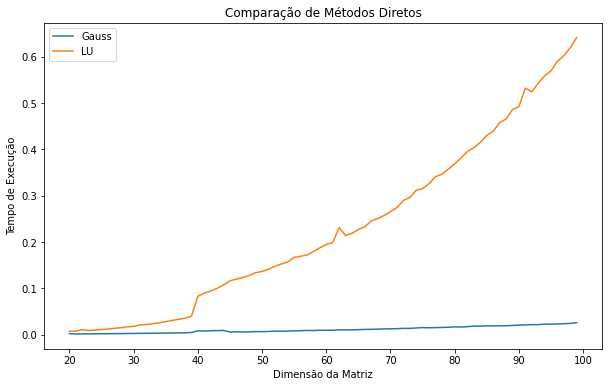

In [ ]:
import numpy as np
import sympy
import scipy
import time as t
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt


n = 20
count = 0
lu_y = np.zeros(100)
lu_x = np.zeros(100)
gauss_y = np.zeros(100)
gauss_x = np.zeros(100)

#Executando 5 casos
while(n <= 100):
    A = sklearn.datasets.make_spd_matrix(n)
    b = 2*np.random.random_sample(n)
    #print("=======TAMANHO DAS MATRIZES A E B=======\n")
    #print("Matriz A: ", n, "x", n) 
    #print("B: ", n)
    #print("\n")

    #print("=======DECOMPOSICAO LU IMPLEMENTADA=======")
    start_time = t.time()
    (L, U) = decompLU(A)
    solveLU(L, U, b)
    end_time = t.time()
    #print("Tempo para realizar a Decomposicao LU implementada: %s segundos ---\n" % (end_time - start_time))

    lu_y[count] = end_time - start_time

    ##Eliminação de Gauss
    #print("=======ELIMINACAO DE GAUSS=======")
    start_time = t.time()
    eliminacao_gauss_pivo(A,b)
    end_time = t.time()
    #print("Eliminacao de Gauss: %s segundos ---\n" % (end_time - start_time))

    gauss_y[count] = end_time - start_time
    
    gauss_x[count] = n
    lu_x[count] = n
    n += 1
    count+=1
    
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(gauss_x[0:80], gauss_y[0:80], lu_x[0:80], lu_y[0:80])
plt.legend(['Gauss', 'LU'], loc='best')
plt.xlabel('Dimensão da Matriz')
plt.ylabel('Tempo de Execução')
plt.title('Comparação de Métodos Diretos')
plt.show()



###**Adicionando a solução da própria biblioteca NumPy**

Adicionando à comparação a função np.linalg.solve da biblioteca que já está implementada, e com ela é possível perceber que há uma certa proximidade entre a velocidade dessa função e a Eliminação de Gauss implementada, porém, como as funções das bibliotecas possuem um certa otimização é compreensível que haja um desvio

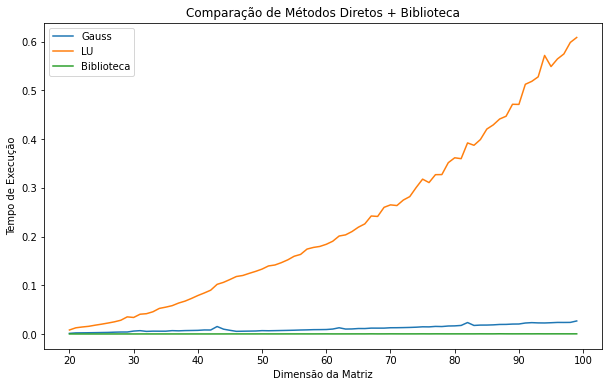

In [ ]:
import numpy as np
import sympy
import scipy
import time as t
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt


n = 20
count = 0
lu_y = np.zeros(100)
lu_x = np.zeros(100)
gauss_y = np.zeros(100)
gauss_x = np.zeros(100)
biblio_y = np.zeros(100)
biblio_x = np.zeros(100)

#Executando 100 casos
while(n <= 100):
    A = sklearn.datasets.make_spd_matrix(n)
    b = 2*np.random.random_sample(n)
    #print("=======TAMANHO DAS MATRIZES A E B=======\n")
    #print("Matriz A: ", n, "x", n) 
    #print("B: ", n)
    #print("\n")

    #print("=======DECOMPOSICAO LU IMPLEMENTADA=======")
    start_time = t.time()
    (L, U) = decompLU(A)
    solveLU(L, U, b)
    end_time = t.time()
    #print("Tempo para realizar a Decomposicao LU implementada: %s segundos ---\n" % (end_time - start_time))

    lu_y[count] = end_time - start_time

    ##Eliminação de Gauss
    #print("=======ELIMINACAO DE GAUSS=======")
    start_time = t.time()
    eliminacao_gauss_pivo(A,b)
    end_time = t.time()
    #print("Eliminacao de Gauss: %s segundos ---\n" % (end_time - start_time))

    gauss_y[count] = end_time - start_time
    
    start_time = t.time()
    np.linalg.solve(A,b)
    end_time = t.time()

    biblio_y[count] = end_time - start_time

    biblio_x[count] = n
    gauss_x[count] = n
    lu_x[count] = n
    n += 1
    count+=1

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(gauss_x[0:80], gauss_y[0:80], lu_x[0:80], lu_y[0:80], biblio_x[0:80], biblio_y[0:80])
plt.legend(['Gauss', 'LU', 'Biblioteca'], loc='best')
plt.xlabel('Dimensão da Matriz')
plt.ylabel('Tempo de Execução')
plt.title('Comparação de Métodos Diretos + Biblioteca')
plt.show()



##**Métodos iterativos: Método de Gauss-Jacobi e de Gauss-Seidel**




####**Gauss - Jacobi**

<br>

O método de Gauss-Jacobi é um método interativo "não-exato" que aproxima-se de uma solução, esse consiste na inserção de um vetor de valores aleatórios como "chute" para que o método calcule iterativamente a solução a partir daquele chute. O funcionamento do método é descrito da seguinte maneira:<br>
Primeiramente, isola-se os elementos da diagonal principal do sistema $Ax = b$ dividindo por eles em ambos os lados de cada equação, supondo assim que $a_{ii} \neq 0$, a seguir, zeramos a diagonal principal da matriz $A$. Assim temos o seguinte sistema de equações e a respectiva matriz:

><center>$\begin{cases}
a_{11}x_{1} + a_{12}x_{2} − · · · − a_{1n}x_{n} = b_{1} \\
a_{21}x_{1} + a_{22}x_{2} − · · · − a_{1n}x_{n} = b_{2} \\
a_{31}x_{1} + a_{32}x_{2} − · · · − a_{1n}x_{n} = b_{3} \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ ... \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ ... \\
a_{n1}x_{1} + a_{n2}x_{3} − · · · − a_{nn}x_{n} = b_{n} \\
\end{cases}$

Isolando:
<br>

><center>$\begin{cases}
x_{1} =  (b_{1} − a_{12}x_{2} − a_{13}x_{3} − · · · − a_{1n}x_{n})/a_{11} \\
x_{2} = (b_{2} − a_{21}x_{1} − a_{23}x_{3} − · · · − a_{2n}x_{n})/a_{22} \\
x_{3} = (b_{3} − a_{31}x_{1} − a_{32}x_{2} − · · · − a_{3n}x_{n})/a_{33} \\
... \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ ... \\
x_{n} = (b_{n} − a_{n1}x_{1} − a_{n2}x_{2} − · · · − a_{n,n-1}x_{n-1})/a_{nn} \\
\end{cases}$

Equivalente às matrizes abaixo:
<br>

><center>$\begin{bmatrix}0 & -a_{12}/a_{11} & -a_{13}/a_{11} & ... & -a_{1n}/a_{11} \\
-a_{21}/a_{22} & 0 & -a_{23}/a_{22} & ... & -a_{2n}/a_{22} \\
-a_{31}/a_{33} & -a_{32}/a_{33} & 0 & ... & -a_{3n}/a_{33} \\
...    &  ...   &  ...   & ... & ... \\
-a_{n1}/a_{nn} & -a_{n2}/a_{nn} & -a_{n,n-1}/a_{nn} & ... & 0 \\
\end{bmatrix}$

<br>

><center>$\begin{bmatrix}b_{1}/a_{11} \\
b_{2}/a_{22} \\
b_{3}/a_{33} \\
... \\
b_{n}/a_{nn} \\
\end{bmatrix}$

Com isso, no sistema, os valores do chute convergem para a solução ao longo das iterações, sendo $n$ representando as iterações:

><center>$\begin{cases}
x_{1}^{(n+1)} =  (b_{1} − a_{12}x_{2}^{(n)} − a_{13}x^{(n)}_{3} − · · · − a_{1n}x^{(n)}_{n})/a_{11} \\
x_{2}^{(n+1)} = (b_{2} − a_{21}x_{1}^{(n)} − a_{23}x^{(n)}_{3} − · · · − a_{2n}x^{(n)}_{n})/a_{22} \\
x_{3}^{(n+1)} = (b_{3} − a_{31}x_{1}^{(n)} − a_{32}x^{(n)}_{2} − · · · − a_{3n}x^{(n)}_{n})/a_{33} \\
... \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ ... \\
x_{n}^{(n+1)} = (b_{n} − a_{n1}x_{1}^{(n)} − a_{n2}x^{(n)}_{2} − · · · − a_{n,n-1}x^{(n)}_{n-1})/a_{nn} \\
\end{cases}$

###**Convergência do Método**

O método converge quando se obedece ao critério das colunas ou ao das linhas. Tais critérios são dados por, para $1\le k \le n$:<br><br>
Linhas:
><center>$\alpha = max\{\alpha_k\} < 1,$ com $\alpha_k=\frac{\sum^n_{j=1\\j \neq k}|a_{kj}|}{|a_{kk}|}$<br><br>

Colunas:
><center>$\alpha = max\{\alpha_k\} < 1,$ com $\alpha_k=\frac{\sum^n_{i=1\\i \neq k}|a_{ik}|}{|a_{kk}|}$<br><br>







In [ ]:
import numpy as np

#N eh o 'infinito'
#x eh o chute inicial
def jacobi(A, b, N, x, erro):                                                                                                                                                        

    n = np.shape(A)[0]
    flag = 0

    #teste das linhas
    tA = np.copy(A)
    np.fill_diagonal(tA, 0)
    for i in range(n):
        sum = np.sum(np.abs(tA[i]))
        #print(sum, A[i][i])
        div1 = sum/np.abs(A[i][i])
        #print(div)
        if div1 >= 1:
            #print("Nao atende ao criterio das colunas, alpha(k) = ", div)
            flag = 1
    #

    if flag == 1:
        #teste das colunas
        for i in range(n):
            sum = 0
            for j in range(n):
                sum += np.abs(tA[j][i])
                #print(sum, A[i][i])
            div2 = sum/np.abs(A[i][i])
            if div2 >= 1:
                print("Nao atende ao criterio, alpha(k) = ", div1, " e ", div2, " n: ", n)
                return -1, -1
        #

    D = np.zeros((n,n))
    for i in range(n):
        D[i,i] = A[i,i]

    D_inv = np.linalg.inv(D)
    I = np.eye(n)

    C = I - np.dot(D_inv, A)
    g = np.dot(D_inv, b)

    count = 0

    while count < N and abs(np.linalg.norm(b-np.dot(A, x))) > erro:
        x = np.dot(C,x) + g
        count+=1

    if count == N:
        return count,x

    return count, x






####**Gauss - Seidel**

<br>

O método de Gauss-Seidel funciona analogamente ao método de Gauss-Jacobi, porém com a diferença de que, nele, há uma grande redução no número de iterações necessárias para atingir o objetivo de aproximar-se às raízes. Em Gauss-Jacobi, primeiramente, iriam se substituir todos os valores do chute na iteração 0 para encontrar todos os da iteração 1, e assim por diante.
Já em Gauss-Seidel, o algoritmo funciona substituindo os valores e, ao longo das iterações, os novos valores obtidos em iterações anterioes já são substituidos, não necessecitando dos valores antigos. 

Dessa forma, as iterações são dadas pelo seguinte, sendo $n$ a iteração:

<br> 

><center>$\begin{cases}
x_{1}^{(n+1)} =  (b_{1} − a_{12}x_{2}^{(n)} − a_{13}x^{(n)}_{3} − · · · − a_{1n}x^{(n)}_{n})/a_{11} \\
x_{2}^{(n+1)} = (b_{2} − a_{21}x_{1}^{(n+1)} − a_{23}x^{(n)}_{3} − · · · − a_{2n}x^{(n)}_{n})/a_{22} \\
x_{3}^{(n+1)} = (b_{3} − a_{31}x_{1}^{(n+1)} − a_{32}x^{(n+1)}_{2} − · · · − a_{3n}x^{(n)}_{n})/a_{33} \\
... \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ ... \\
x_{n}^{(n+1)} = (b_{n} − a_{n1}x_{1}^{(n+1)} − a_{n2}x^{(n+1)}_{2} − · · · − a_{n,n-1}x^{(n+1)}_{n-1})/a_{nn} \\
\end{cases}$

In [ ]:

    
def seidel(a, b, n, x, erro):

    l = np.tril(a)
    r = a - l

    c = (np.dot(-np.linalg.inv(l), r))
    g = np.dot(np.linalg.inv(l), b)
    count = 0
    while count < n and abs(np.linalg.norm(b-np.dot(a, x))) > erro:
        x = np.dot(c, x) + g
        count+=1

    if(count == n):
        return count, x
    
    return count, x

##**Comparação entre o Método Iterativo (Gauss-Seidel) e Método Direto (Eliminação Gaussiana)**

Foram comparados três métodos, Eliminação Gaussiana, Gauss-Seidel para 5 casas decimais, Gauss-Seidel para 2 casas decimais. Nessa situação, a Eliminação Gaussiana obteve o melhor desempenho em matrizes arbitrariamente grandes válidas geradas randomicamente (maiores que 200x200).<br>
O método de Gauss-Seidel teve como entrada matrizes aleatórias e tem a vantagem de ocupar menos espaço, quando comparado a Eliminação Gaussiana. Porém, tal método fornece uma aproximação até a quinta casa decimal, quando se reduz a aproximação para duas casas decimais, o método se torna mais rápido que o escalonamento para matrizes de dimensão de até 200x200.
O gráfico foi construido colocando o tempo de execução em função do tamanho das matrizes


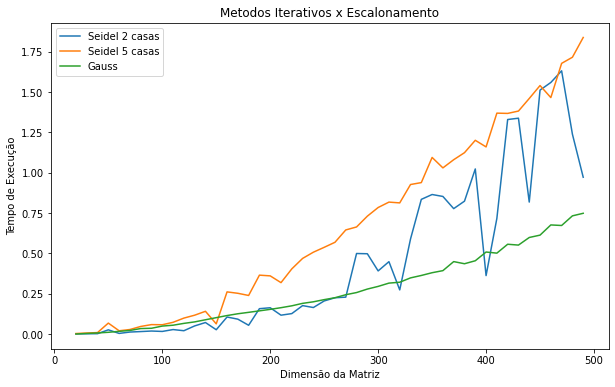

In [ ]:
import time as t
import numpy as np
import scipy
import sklearn
from sklearn import datasets

def testegaussiana(B,g):
    #Testando o tempo gasto pelo método direto - Eliminação Gaussiana
    x = eliminacao_gauss_pivo(B,g)


def testeseidel_5(B,g,x):
    #Testando o tempo gasto pelos métodos iterativos - Método de Gauss-Seidel
    (it,ans) = seidel(B, g, 10000, x, 10E-5)
    

def testeseidel_2(B,g,x):
    #Testando o tempo gasto pelos métodos iterativos - Método de Gauss-Seidel
    (it,ans) = seidel(B, g, 10000, x, 10E-2)
    


#Gerando objetos necessários para os testes

n = 20
count = 0
gauss_y = np.zeros(50)
gauss_x = np.zeros(50)

seidel_5_y = np.zeros(50)
seidel_5_x = np.zeros(50)

seidel_2_y = np.zeros(50)
seidel_2_x = np.zeros(50)

#Executando 500 casos
while(n <= 500):
    A = sklearn.datasets.make_spd_matrix(n)
    b = 2*np.random.random_sample(n)
    x = np.zeros(n)


    #print("=======TAMANHO DAS MATRIZES A E B=======\n")
    #print("Matriz A: ", n, "x", n) 
    #print("B: ", n)
    #print("\n")

    #print("=======DECOMPOSICAO LU IMPLEMENTADA=======")
    start_time = t.time()
    testegaussiana(A,b)
    end_time = t.time()
    #print("Tempo para realizar a Decomposicao LU implementada: %s segundos ---\n" % (end_time - start_time))

    gauss_y[count] = end_time - start_time


    l = np.tril(A)
    r = A - l
    l_inv = np.linalg.inv(l)
    c = (np.dot(-l_inv, r))
    d = np.dot(l_inv, b)
    
    start_time = t.time()
    testeseidel_5(A,b,x)
    end_time = t.time()


    seidel_5_y[count] = end_time - start_time

    start_time = t.time()
    testeseidel_2(A,b,x)
    end_time = t.time()

    seidel_2_y[count] = end_time - start_time


    seidel_2_x[count] = n
    seidel_5_x[count] = n
    gauss_x[count] = n

    n += 10
    count += 1



plt.figure(figsize=(10,6),facecolor='white')
plt.plot(seidel_2_x[0:48], seidel_2_y[0:48], seidel_5_x[0:48], seidel_5_y[0:48], gauss_x[0:48], gauss_y[0:48])
plt.legend(['Seidel 2 casas', 'Seidel 5 casas', 'Gauss'], loc='best')
plt.xlabel('Dimensão da Matriz')
plt.ylabel('Tempo de Execução')
plt.title('Metodos Iterativos x Escalonamento')
plt.show()





##**Comparação entre os Métodos Iterativos: Método de Gauss-Jacobi e Gauss-Seidel**

Como o método de Gauss-Jacobi necessita de um conjunto diferente de matrizes para rodar, a comparação a ser feita utilizando tal método dará-se a partir da contagem do número de iterações que cada um deles realizará.<br>
É possível observar que o Método de Seidel encontra as raízes num número de iterações bem menor, e essa é a vantagem de Gauss-Seidel. Porém, pelo fato de depender da solução das equações anteriores, ele não pode ser paralelizável, diferente do que ocorre com Gauss-Jacobi.

In [ ]:
def testejacobi(B,g,x):
    #Testando o tempo gasto pelos métodos iterativos - Método de Gauss-Jacobi
     #print("=========== METODOS ITERATIVOS =============")
    (it,ans) = jacobi(B, g, 10000, x, 10E-5)
    print("Numero de iteracoes utilizada pelo metodo de Jacobi: ", it)
    print("Raizes encontradas por jacobi: ", ans, "\n")


def testeseidel_5(B,g,x):
    #Testando o tempo gasto pelos métodos iterativos - Método de Gauss-Seidel

    (it,ans) = seidel(B, g, 10000, x, 10E-5)
    print("Numero de iteracoes utilizada pelo metodo de Seidel: ", it)
    print("Raizes encontradas por seidel: ", ans, "\n")


print("============================")

A = np.array([[10, 2, 1], [1, 5, 1], [2, 3, 10]], dtype='double')
b = np.array([7, -8, 6])
x = np.array([0.7,-1.6, 0.6])

testejacobi(A, b, x)
testeseidel_5(A, b, x)
print("Solucao da biblioteca: ", np.linalg.solve(A, b))

print("============================")

A = np.array([[5, 2, 1], [1, 4, 1], [2, 3, 6]], dtype='double')
b = np.array([7, -8, 6])
x = np.array([0.7,-1.6, 0.6])

testejacobi(A, b, x)
testeseidel_5(A, b, x)
print("Solucao da biblioteca: ", np.linalg.solve(A, b))

print("============================")

A = np.array([[25, 12, 4], [5, 20, 13], [12, 16, 32]], dtype='double')
b = np.array([7, -8, 6])
x = np.array([0.7,-1.6, 0.6])

testejacobi(A, b, x)
testeseidel_5(A, b, x)
print("Solucao da biblioteca: ", np.linalg.solve(A, b))

print("============================")


Numero de iteracoes utilizada pelo metodo de Jacobi:  11
Raizes encontradas por jacobi:  [ 1.00000168 -1.99999769  1.00000243] 

Numero de iteracoes utilizada pelo metodo de Seidel:  5
Raizes encontradas por seidel:  [ 1.000007   -2.00000586  1.00000036] 

Solucao da biblioteca:  [ 1. -2.  1.]
Numero de iteracoes utilizada pelo metodo de Jacobi:  22
Raizes encontradas por jacobi:  [ 2.24999436 -3.00000516  1.74999282] 

Numero de iteracoes utilizada pelo metodo de Seidel:  8
Raizes encontradas por seidel:  [ 2.25000294 -2.99999881  1.74999843] 

Solucao da biblioteca:  [ 2.25 -3.    1.75]
Numero de iteracoes utilizada pelo metodo de Jacobi:  61
Raizes encontradas por jacobi:  [ 0.59731101 -0.77867766  0.3528492 ] 

Numero de iteracoes utilizada pelo metodo de Seidel:  12
Raizes encontradas por seidel:  [ 0.59730909 -0.77867671  0.35284744] 

Solucao da biblioteca:  [ 0.59731013 -0.7786788   0.3528481 ]


##**Referências**
* Slides do professor Afonso Paiva

#**Interpolação Polinomial**

<br>

O principal motivo da existência da interpolação polinomial é o desejo de simplificar a representação de funções muito complexas para um polinômio, discretizando a função complicada dada e encontrando esse polinômio que passa pelos pontos. Com isso, será mais simples realizar operações tais como derivar e integrar.
<br><br>
Dado um conjunto de pontos, queremos definir uma função interpoladora (polinômio de interpolação) que passe por todos os pontos.
<br>
><center>$y_i = P_n(x_i)$
<br>




##**Teorema da Existência e Unicidade**

"Dados $n+1$ pontos $((x_{0}, y_{0}),...,(x_{n}, y_{n}))$, com $x_0 < ... < x_n$ existe um único polinômio $P_n(x) \in P_n$ que satisfaz as condições acima."+

##**Demonstração**

Para cada ponto que deve estar na interpolação, devemos aplicar $P_n(x)$ sobre $x_i$ para obter $y_i$. Assim, podemos gerar a Matriz de Vandermond

><center>$X=\begin{bmatrix}1 & x_{0} & x^2_{0} & ... & x^n_{0}\\
1 & x_{1} & x^2_{1} & ... & x^n_{1}\\
1 & x_{2} & x^2_{2} & ... & x^n_{2}\\
...    &  ...   &  ...   & ... & ... \\
1 & x_{n} & x^2_{n} & ... & x^n_{n}\\
\end{bmatrix}$

Para demonstrar que o determinante da Matriz de Vandermond é não-nulo, basta lembrar que ele pode ser calculado a partir da coluna 1 (coluna de $x_0, x_1...$) realizando o produtório:

><center>$det(X) = \prod_{i<k} (x_k - x_i) \neq 0$, como $x_k \neq x_i$





##**Forma de Lagrange**

A Forma de Lagrange determina como o polinômio de interpolação $P_n(x)$ será dado, nela. Uma das fraquezas dessa forma é a necessidade de recalcular o polinômio inteiro toda vez que um novo ponto é adicionado:

><center> $P_n(x) = y_0l_0(x) + y_1l_1(x) + ... + y_nl_n(x) = \sum^n_{k=0}y_kl_k(x) $

<br>

$l_k(x) \in P_n$, polinômios que dependem somente de $x_0,...,x_n$

O objetivo é aplicar o polinômio sobre um $x_i$ e fazer com que ele te "devolva" $yi$. Dessa forma, podemos estabelecer o seguinte:

><center>$P_n(x_i) = y_0l_0(x_i) + ... + y_il_i(x_i) + ... + y_nl_n(x_i) = y_i$

<br> 
Para ter $P_n(x_i) = y_i$ é necessário que os valores os quais acompanham $y_i$ sejam 1 e todos os outros sejam 0. Assim:

><center>$l_k(x_i)=\begin{cases}
1, \ se \ \ i = k \\
0, \ se \ \ i \neq k\\
\end{cases}$


Se pegarmos para $x$ as raízes de $l_k$, isto é, $x_k$ que leva $l_k$ em 0, podemos escrever tais raízes como $\{x_0, ... , x_{x-1}, x_{k-1}, ..., x_n\}$

Daí, fatorando, temos, para x:

><center> $l_k(x) = a \prod^{n}_{{i=0}\\{i \ne k}}(x-x_i)$

Avaliando quando o polinômio é 1, para obter $a$:

><center> $l_k(x_k) = a \prod^{n}_{{i=0}\\{i \ne k}}(x_k-x_i)$

Portando, como, no produtório $i \neq k$, podemos reescrever para $ 0 \le k \le n$. Assim, obtemos o Polinômio de Lagrange:

><center>$l_k(x) = \prod^n_{{i=0}\\{i \ne k}} \frac{x-x_i}{x_k-x_i}$



##**Implementação da Interpolação de Lagrange**

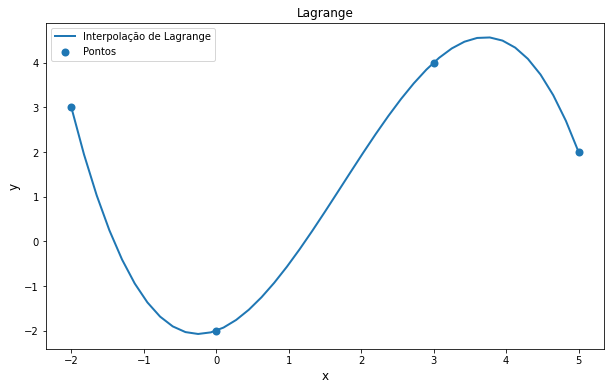

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def LagrangeInterpolation(xi, yi, points):
	m = points.size
	l = np.ones(xi.shape, dtype='double')
	ans = np.zeros(m)
	
	for j in range (0, m):	
		for k in range(0, len(xi)): 
			for i in range(0, len(xi)):
				if i != k:
					l[k] *= (points[j]-xi[i])/(xi[k]-xi[i])	 
		ans[j] = yi.dot(l)
		l = np.ones(xi.shape)
		
	return ans

		
values_x = np.array([-2,0,3,5], dtype='double')
values_y = np.array([3,-2,4,2], dtype='double')
points_x = np.linspace(-2, 5, num=41, endpoint=True)
points_y = LagrangeInterpolation(values_x, values_y, points_x)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(points_x,points_y,label = 'Interpolação de Lagrange',linewidth = 2)
plt.scatter(values_x,values_y,label = 'Pontos',linewidth = 2) 
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Lagrange') 
plt.legend() 
plt.show()

##**Forma de Newton**

A Forma de Newton é dada pelo seguinte:

$P_n(x) = \alpha_0 + \alpha_1(x-x_) + \alpha_2(x-x_0)(x-x_1) + ... + \alpha_n(x-x_0)(x-x_1)...(x-x_{n-1})$

Onde cada um dos $\alpha_k \ \ (0 \le k \le n)$ é determinado pela diferença dividida.







###**Diferença dividida**

A diferença dividida é calculada recursivamente (de forma semelhante ao conceito de DP em computação). A maneira mais fácil de se enxergar como tal cálculo das diferenças é dada pela construção da tabela de diferenças divididas, da seguinte forma:

| $x$ |------&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ordem 0&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;------|------&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ordem 1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;------|------&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ordem 2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;------|------&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ordem 3&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;------| ... |
|-----|---------------------|---------|---------|---------|-----|
|$x_0$|$f[x_0] = \alpha_0$|$f[x_0,x_1] = \alpha_1$|$f[x_0,x_1,x_2] = \alpha_2$|$f[x_0,x_1,x_2,x_3] = \alpha_3$|...|
|$x_1$|$f[x_1]$|$f[x_1,x_2]$|...|...|...|
|$x_2$|$f[x_2]$|$f[x_2,x_3]$|...|...|...|
|$x_3$|$f[x_3]$|...|...|...|...|
|...|...|...|...|...|...|

<br><br>

Onde para $f[x_0, x_1] = \alpha_1 = \frac{f[x_1]-f[x_0]}{x_1-x_0}$.<br><br>
Para $f[x_0, x_1, x_2] = \alpha_2 = \frac{f[x_1,x_2]-f[x_0,x_1]}{x_2-x_0}$<br><br>
Assim por diante, é importante ressaltar que a divisão é feita por um intervalo que aumenta, isso pode ser esquecido ao aplicar o método. Para o termo geral, temos:<br>

><center>$f[x_{i_{0}},x_{i_{1}},...,x_{i_{k}}] = \frac{f[x_{i_{1}},...,x_{i_{k}}] - f[x_{i_{0}},x_{i_{1}},...,x_{i_{k-1}}]}{x_{i_{k}}-x_{i_{0}}}$

<br>







###**Vantagem da Forma de Newton**
* Diferentemente do que ocorre com Lagrange, para a Forma de Newton não é necessário recalcular todos os pontos assim que um novo é adicionado.




##**Erro na Interpolação de Lagrange e Newton**

O erro do polinômio de interpolação da $f(x)$ pode ser dado pelo seguinte teorema, no intervalo $(a,b)$:

><center>$E_n(x) = f(x) - P_n(x) = \frac{f^{(n+1)}(\zeta)}{(n+1)!}$

em que $\zeta \in \ (a,b)$ 

Onde, segue como corolário a aproximação da estimativa do erro:
<br>
><center>$|E_n(x)| \le \frac{1}{(n+1)!} ||f^{(n+1)}||_\infty \prod^n_{i=0}|x-x_i|$
<br>

><center>$|E_n(x)| \le \frac{1}{(n+1)!} ||f^{(n+1)}||_\infty (b-a)^{n-1}$
<br>

Calculando o erro, levanta-se a questão sobre a relação entre o grau do polinômio e a "qualidade" da aproximação realizada, ainda mais, o polinômio da interpolação tende à função conforme aumenta-se o grau? Tal questão é explicada pelo Fenômeno de Runge.
<br>

###**Fenômeno de Runge**

O Fenômeno de Runge permite concluir que a resposta para a questão levantada acima é "não" e o polinômio não necessariamente tende à função conforme o grau aumenta. Dessa forma, para melhorar a "qualidade" da representação podemos tentar realizar a representação do polinômio por partes, com o uso de splines, por exemplo. O Fenômeno de Runge pode ser representado pelo exemplo abaixo, na qual tenta-se representar a função desenhada pelos polinômios de grau 5, 10 e 15, mostrando que o aumento do grau causou, inclusive, um certo aumento no erro no caso do polinomio de grau 5 para o grau 10, mas, em seguida uma diminuição - de certa forma insignificante, pois continua com um erro maior que o polinômio de grau 5 - nesse erro:

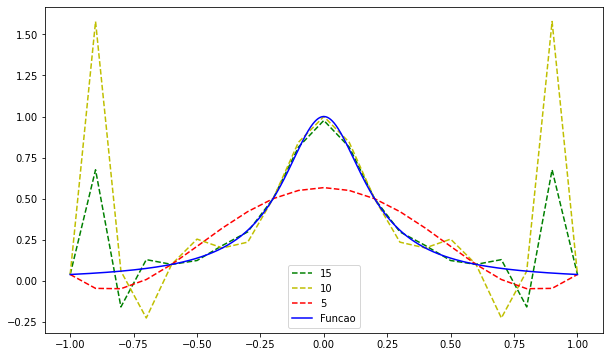

In [ ]:
import scipy
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

x_test = np.linspace(-1, 1, num=10000, endpoint=True)
y_test = 1/(1+25*x_test*x_test)

x = np.linspace(-1, 1, num=6, endpoint=True)
y = 1/(1+25*x*x)

# Interpolando para o polinomio de grau 5
grau_5 = interpolate.lagrange(x, y)
grau_5x = np.arange(-1, 1.1, 0.1)
grau_5y = grau_5(grau_5x)

x2 = np.linspace(-1, 1, num=11, endpoint=True)
y2 = 1/(1+25*x2*x2)

#Interpolando para o polinomio de grau 10
grau_10 = interpolate.lagrange(x2, y2)
grau_10x = np.arange(-1, 1.1, 0.1)
grau_10y = grau_10(grau_10x)


x3 = np.linspace(-1, 1, num=16, endpoint=True)
y3 = 1/(1+25*x3*x3)

#Interpolando para o polinomio de grau 15
grau_15 = interpolate.lagrange(x3, y3)
grau_15x = np.arange(-1, 1.1, 0.1)
grau_15y = grau_15(grau_15x)


#Plotando o Fenômeno de Runge
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(grau_15x, grau_15y, 'g--', grau_10x, grau_10y, 'y--', grau_5x, grau_5y, 'r--', x_test, y_test, 'b-')
plt.legend(['15', '10', '5', 'Funcao'], loc='best')
plt.show()

##**Splines**

Splines são aplicações das interpolações que dividem por partes a função a ser representada com mais de um polinômio, sendo cada um deles de grau $k$. Nesse trabalho, serão apresentadas Splines Cúbicas e Splines Lineares, também consideradas como possíveis soluções para problemas como o Fenômeno de Runge, anteriormente mostrado.<br> Formalizando esse conceito, temos, para $(n+1)$ pontos no intervalo $[a,b]$, sendo cada um deles: $(x_0,y_0),...,(x_n,y_n)$ com $ a = x_0 < ... < x_n = b$, temos três condições que precisam ser satisfeitas:<br>
* $S_{k,i} = S_k|_{x_i,x_{i+1}}$, com $0 \le i \le n-1$;
* $S_{k} \in C^{k-1}([a,b])$;
* $S_k(x_i) = y_i$, com $0 \le i \le n$



###**Spline Linear**

Considerando o conceito já abordado sobre Splines, a spline linear tem a função de passar pelos pontos desejados com um polinômio de grau 1 ($k = 1$). Tal spline tem sua aplicação como é dado abaixo. Nesse caso, aplicou-se uma Spline Linear utilizando a biblioteca já implementada na SciPy sobre 6 pontos igualmente espaçados sobre a função $cos(x^2)$



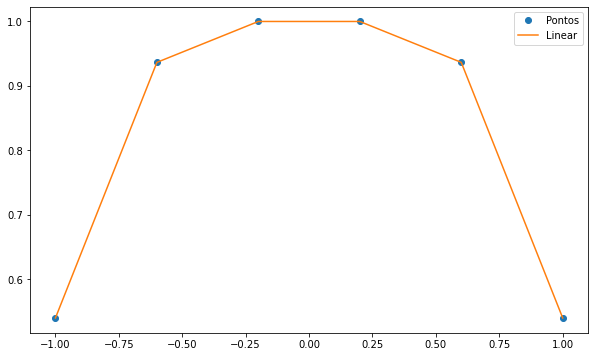

In [ ]:
import scipy
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-1, 1, num=6, endpoint=True)
y = np.cos(x*x)

f = interpolate.interp1d(x, y)

fxnew = np.arange(-1, 1.1, 0.1) #1.1 so para fins de ilustrar melhor as curvas passando pelo ponto
fynew = f(fxnew)   
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x, y, 'o', fxnew, fynew, '-')
plt.legend(['Pontos', 'Linear'])
plt.show()

###**Spline Cúbica**

A Spline cúbica interpola usando polinomios de grau 3 para passar entre os pontos, diferente do que ocorre com a spline linear mostrada acima, ao aplicarmos a spline cúbica ao intervalo da mesma função usada na spline linear. Nesse caso, é possível ver que a Spline Cúbica obteve um resultado bem próximo a função dada ($cos(x^2)$), pois a função quase sobrepõe o pontilhado totalmente


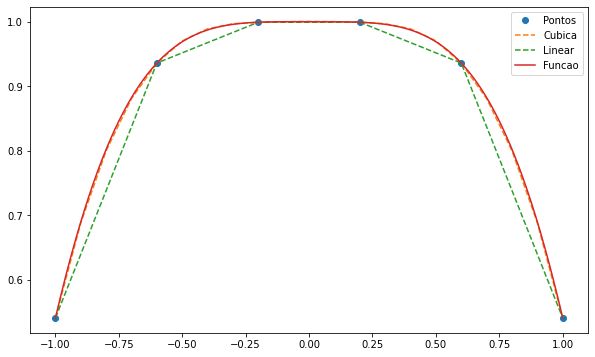

In [ ]:
import scipy
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

x_test = np.linspace(-1, 1, num=10000, endpoint=True)
y_test = np.cos(x_test*x_test)
x = np.linspace(-1, 1, num=6, endpoint=True)
y = np.cos(x*x)

g = interpolate.CubicSpline(x,y)
f = interpolate.interp1d(x, y)

fxnew = np.arange(-1, 1.1, 0.1) 
fynew = f(fxnew)   

gxnew = np.arange(-1, 1.1, 0.1) #10.1 so para fins de ilustrar melhor as curvas passando pelo ponto
gynew = g(gxnew)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x, y, 'o', gxnew, gynew, '--', fxnew, fynew, '--', x_test, y_test, '-')
plt.legend(['Pontos', 'Cubica', 'Linear','Funcao'])
plt.show()

###**CAD em Engenharia**

Nesse caso abaixo, retoma-se um exemplo do uso de spline cúbicas para desenhar o teto de um carro. Tal exemplo tinha sido aplicado em uma das aulas em vídeo displonibilizadas no site da disciplina

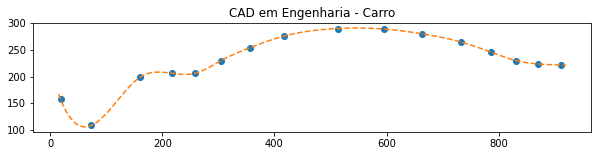

In [ ]:
import scipy
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

x = np.array([18.5, 73.5, 160, 218, 258, 305, 356, 418, 513, 596, 664, 732, 787, 831, 871, 912])
y = np.array([157.5, 108.5, 198.5, 206, 206, 230, 254, 276, 290, 289, 280, 265, 245.5, 230, 223.5, 221.5])

g = interpolate.CubicSpline(x,y)

gxnew = np.arange(15, 920, 0.1) #10.1 so para fins de ilustrar melhor as curvas passando pelo ponto
gynew = g(gxnew)


plt.figure(figsize=(10,2),facecolor='white')
plt.plot(x, y, 'o', gxnew, gynew, '--')
plt.title('CAD em Engenharia - Carro')
plt.show()


###**Uso de Splines Cúbicas e Lineares para criação de Perfis Topográficos**

O processo de construção de um perfil topográfico consiste de várias etapas. Primeiramente, é necessário um mapa do relevo (carta topográfica) da região sobre a qual o desenho do perfil topográfico será aplicado, para as aplicações dadas abaixo, foram utilizadas cartas topográficas de duas cidades brasileiras: Rio de Janeiro (com uma carta de escala 1:250.000) e Uberlândia (com uma carta de escala 1:100.000), disponíveis no site do IBGE, assim como ocorre em todas as cidades brasileiras. Tais cidades foram escolhidas para exemplificar uma situação na qual é possível notar a presença de um rio por meio do perfil topográfico e outra com um alto relevo formando o Morro da Tijuca, próximo ao Cristo Redentor.<br><br>
**Região escolhida do Rio de Janeiro:**<br>
![Imagem Rio de Janeiro](https://i.ibb.co/tL4pfbh/areauberlandia.png)<br><br>
**Região escolhida de Uberlândia:**<br>
![Imagem Uberlandia](https://i.ibb.co/K07j6TJ/arearj.png)<br><br>

Foram apresentadas somente as regiões escolhidas para traçar o Perfil Topográfico pois as imagens das cartas completas demoram um certo tempo para serem carregadas na plataforma, mas podem ser visualizadas no site do IBGE e nos seguintes links:<br> 
**Carta Topográfica do Rio de Janeiro:**<br>
https://i.ibb.co/XCg5FJf/ta491-502sp.png<br>
**Carta Topográfica de Uberlândia:**<br>
https://i.ibb.co/SrwdjDY/ta2451sp.png

Em segundo lugar, após escolher o mapa da região, é necessário traçar uma reta sobre as curvas de nível delimitando qual será a área representada no perfil. Nesse ponto, é importante imaginar a área desejada se colocando como um observador no chão, perpendicularmente ao plano que será representado (a linha desenhada). Essas linhas abaixo mostradas foram traçadas com a finalidade de ilustrar e causar um melhor entendimento, quanto mais fino o traço for realizado, melhor será o resultado. Traçar tal linha, na prática, para realização desse trabalho, foi feito recortando uma linha extremamente fina da folha topográfica no Adobe Photoshop CC. Abaixo, encontram-se as imagens com suas respectivas linhas traçadas:<br><br>
**Linha sobre o Rio de Janeiro:**<br>
![Imagem Rio de Janeiro](https://i.ibb.co/6s84Dp8/tracorj.png)<br><br>
**Linha sobre Uberlândia:**<br>
![Imagem Uberlandia](https://i.ibb.co/0n0NRGR/tracouberlandia.png)<br><br>


Após realização do traço, observa-se onde tal linha intersecta as curvas de nível. Como nos exemplos - novamente, apenas ilustrativos, quanto menores forem marcadas as intersecções, mais precisão se obtém - foram colocados pontos azuis nas intersecções: <br><br>

**Intersecções (Rio de Janeiro):**<br>
![Imagem Intersecções](https://i.ibb.co/VmzxDP8/interrj.png)<br><br>

**Intersecções (Uberlândia):**<br>
![Imagem Intersecções](https://i.ibb.co/LdynTYk/interuberlandia.png)<br><br>

Após realizar tais operações, podemos dizer que temos nosso "Eixo X" pronto. A linha vermelha com os pontos correspondem as coordenadas do eixo das abscissas de cada um dos pontos. Até esse momento, todas as tarefas realizadas acima foram feitas manualmente, a seguir, é preciso fazer com que um programa identifique esse "Eixo X" criado para poder ser plotado com a biblioteca PyPlot. Para isso, utilizou-se da biblioteca OpenCV sobre o recorte realizado no Photoshop anteriormente, as imagens das intersecções estão mostradas abaixo:

**Intersecções (Rio de Janeiro):**<br>
![Imagem Intersecções](https://i.ibb.co/8XQXLhh/rj.png)<br><br>
**Intersecções (Uberlândia):**<br>
![Imagem Intersecções](https://i.ibb.co/84c2S2x/uberlandia.png)<br><br>

Utilizando a biblioteca OpenCv, desejamos encontrar as coordenadas x dos pontos pretos sobre essa linha branca. Ao obter tais coordenadas, temos o Eixo X montado numa variável. Precisamos agora usar das curvas de nível para obter as alturas de cada ponto. Mas antes é importante falar sobre essas curvas.



####**Determinando Altura das Curvas de Nível**
<br>

Ao utilizar as curvas de nível para determinar, precisamos saber: qual altura tal curva de nível representa? Para responder essa pergunta, é importante observar os picos - marcados com 'x' nas imagens mostradas anteriormente -. Cada um deles contém a altura maior que a curva de nível na qual estão no interior. A partir de um pico, podemos determinar a altura da curva de nível cruzada pela nossa reta. Para avaliar tal altura, observa-se a escala do gráfico conforme a tabela mostrada, onde "equidistância" mostra a distância entre as linhas de nível e as curvas mestras são as linhas mais escuras da imagem, colocadas a cada $x$ metros dependendo da escala:

![Tabela](https://i.ibb.co/zGYrBds/tabela.png)




####**Construção das Alturas**
<br>

Para os mapas do Rio e de Uberlândia teremos uma equidistância de 50m e 100m e curvas mestras de 250m e 500m, respectivamente. Assim, montamos o vetor de alturas de cada um dos pontos da seguinte forma:

* Para o RJ: [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1000, 900, 800, 700, 600, 500, 400, 300, 200, 200, 200, 100, 100, 100, 100]
* Para Uberlândia: [930, 900, 850, 800, 750, 700, 650, 650, 650, 600, 600, 650, 700, 750]

Após isso, temos as coordenadas $(x,y)$ de todos os pontos, tanto para Uberlândia, quanto para o Rio de Janeiro


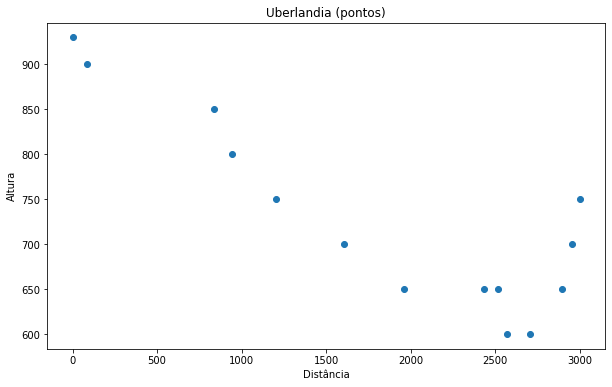

In [ ]:
import cv2
import scipy
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


path = 'uberlandia.png'

uberlandia_curvas = cv2.imread(path,0)

th, threshed = cv2.threshold(uberlandia_curvas, 100, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU) 


cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2] 



s1 = 0
s2 = 80
curvas = []
for cnt in cnts:
    if s1 < cv2.contourArea(cnt) < s2:
        curvas.append(cnt)

x = []
for i in range(len(curvas)):
    x.append(curvas[i][0][0][0])

x.append(0) ## adicionando o pico
x = x[::-1]
y = [930, 900, 850, 800, 750, 700, 650, 650, 650, 600, 600, 650, 700, 750]

interpoladora = interpolate.CubicSpline(x,y)
f = interpolate.interp1d(x, y, fill_value='extrapolate')


interpoladoraxnew = np.arange(0, 3000, 0.1) #10.1 so para fins de ilustrar melhor as curvas passando pelo ponto
interpoladoraynew = interpoladora(interpoladoraxnew)
fxnew = np.arange(0, 3000, 0.1)
fynew = f(fxnew)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x, y, 'o')
plt.title('Uberlandia (pontos)')
plt.xlabel('Distância')
plt.ylabel('Altura')
plt.show()


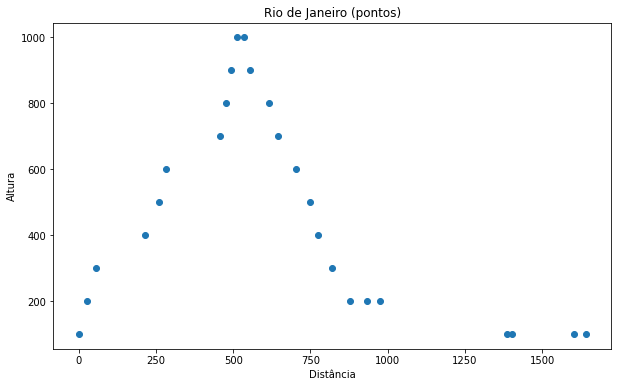

In [ ]:
import cv2
import scipy
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


path = 'rj.png'

rj_curvas = cv2.imread(path,0)

th, threshed = cv2.threshold(rj_curvas, 100, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU) 


cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2] 

#print(cnts)

s1 = 0
s2 = 80
curvas = []
for cnt in cnts:
    if s1 < cv2.contourArea(cnt) < s2:
        curvas.append(cnt)

x = []
for i in range(len(curvas)):
    x.append(curvas[i][0][0][0])


x = x[::-1]

x.pop()

y = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1000, 900, 800, 700, 600, 500, 400, 300, 200, 200, 200, 100, 100, 100, 100]

g = interpolate.CubicSpline(x,y)
f = interpolate.interp1d(x, y, fill_value='extrapolate')

gxnew = np.arange(0, 1700, 0.1) #10.1 so para fins de ilustrar melhor as curvas passando pelo ponto
gynew = g(gxnew)
fxnew = np.arange(0, 1700, 0.1)
fynew = f(fxnew)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x, y, 'o')
plt.title('Rio de Janeiro (pontos)')
plt.xlabel('Distância')
plt.ylabel('Altura')
plt.show()


Usando uma Spline Cúbica e outra Linear (para observar qual realizar uma melhor interpolação), conectando os pontos, temos:

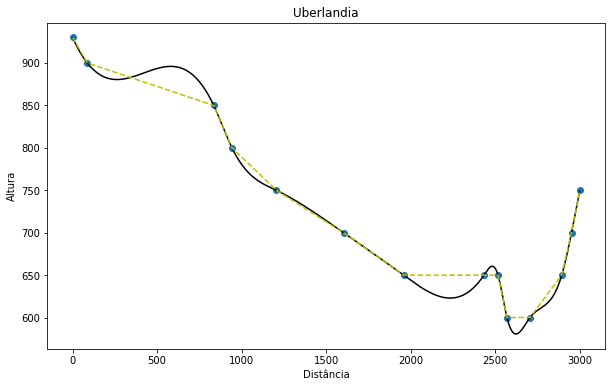

In [ ]:
import cv2
import scipy
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


path = 'uberlandia.png'

uberlandia_curvas = cv2.imread(path,0)

th, threshed = cv2.threshold(uberlandia_curvas, 100, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU) 


cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2] 



s1 = 0
s2 = 80
curvas = []
for cnt in cnts:
    if s1 < cv2.contourArea(cnt) < s2:
        curvas.append(cnt)

x = []
for i in range(len(curvas)):
    x.append(curvas[i][0][0][0])

x.append(0) ## adicionando o pico
x = x[::-1]
y = [930, 900, 850, 800, 750, 700, 650, 650, 650, 600, 600, 650, 700, 750]

interpoladora = interpolate.CubicSpline(x,y)
f = interpolate.interp1d(x, y, fill_value='extrapolate')


interpoladoraxnew = np.arange(0, 3000, 0.1) #10.1 so para fins de ilustrar melhor as curvas passando pelo ponto
interpoladoraynew = interpoladora(interpoladoraxnew)
fxnew = np.arange(0, 3000, 0.1)
fynew = f(fxnew)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x, y, 'o', interpoladoraxnew, interpoladoraynew, 'k-', fxnew, fynew, 'y--')
plt.xlabel('Distância')
plt.ylabel('Altura')
plt.title('Uberlandia')
plt.show()


####**Análise do perfil de Uberlândia**
Analisando o perfil acima, percebemos a possível existência de um rio (Rio Araguari) entre as montanhas, existência essa confirmada pelo mapa hidrográfico da região, como mostrado abaixo na sobreposição grosseira das folhas topográficas:

![Rio](https://i.ibb.co/BGFnpnN/riouberlandia.png)

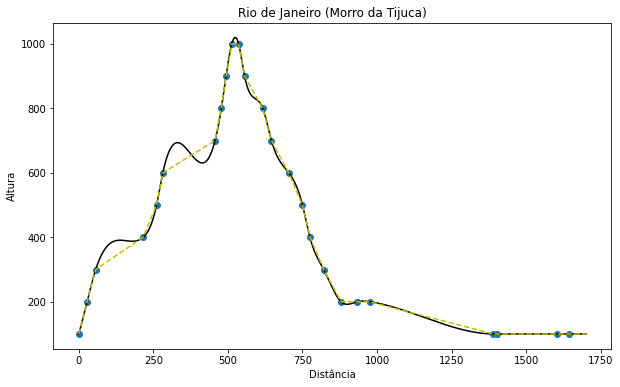

In [ ]:
import cv2
import scipy
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


path = 'rj.png'

rj_curvas = cv2.imread(path,0)

th, threshed = cv2.threshold(rj_curvas, 100, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU) 


cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2] 

#print(cnts)

s1 = 0
s2 = 80
curvas = []
for cnt in cnts:
    if s1 < cv2.contourArea(cnt) < s2:
        curvas.append(cnt)

x = []
for i in range(len(curvas)):
    x.append(curvas[i][0][0][0])


x = x[::-1]

x.pop()

y = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1000, 900, 800, 700, 600, 500, 400, 300, 200, 200, 200, 100, 100, 100, 100]

g = interpolate.CubicSpline(x,y)
f = interpolate.interp1d(x, y, fill_value='extrapolate')

gxnew = np.arange(0, 1700, 0.1) #10.1 so para fins de ilustrar melhor as curvas passando pelo ponto
gynew = g(gxnew)
fxnew = np.arange(0, 1700, 0.1)
fynew = f(fxnew)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x, y, 'o', gxnew, gynew, 'k-', fxnew, fynew, 'y--')
plt.title('Rio de Janeiro (Morro da Tijuca)')
plt.xlabel('Distância')
plt.ylabel('Altura')
plt.show()


####**Análise do perfil do Morro da Tijuca**

É extremamente interessante observar o comportamento das splines para plotar tais Perfis Topográficos, principalmente, pois o trabalho da Spline é realizado de uma forma mais suave e automática. Outra questão importante de ser abordada é o fato de em alguns pontos, como, por exemplo, entre 260 e 450 no Eixo X traçado do Morro da Tijuca, na figura acima. Nessa situação, a Spline Linear apresentou um comportamento mais fiel a realidade, provavelmente, mas que não anula o que foi traçado pela mesma Cúbica, algo que não ocorre muito usualmente para essas situações.

##**Referências**

* Traçando perfil topográfico: https://edisciplinas.usp.br/pluginfile.php/2612815/mod_resource/content/2/6%20Representacoes%20_Altimetricas.pdf
* Slides do professor Afonso Paiva
* Cartas: https://www.ibge.gov.br/geociencias/cartas-e-mapas/folhas-topograficas/15809-folhas-da-carta-do-brasil.html?=&t=downloads